## Used Cars Market: Data Analysis & Prices Prediction

### Purpose the study

The Used cars market in the past few years has reached a big improvement in the number of Buyers, Sellers and Investors due to the Economic developments that the country has gone through and the nature of the market it self.

This has raised alot of questions about the market and the concern to estimate the different types of used cars prices.

For that purpose i have conducted a Data Science project that would answer these questions and predict the cars prices in the 
Egyptian market.


I have already scraped around 12000 Ads from www.contactcars.com in the previous notebook.

Objective of this Notebook:

In this notebook i will continue with my project stages and conduct:

1. Data Cleaning
2. Features Engineering
3. Data Anlaysis
4. Applying Machine Learning Model

### About the Dataset

As i mentioned before i have scraped 12000 Ads from contactcars.com with 45 columns that describes that cars main and sub features such as(Model name,Submodel,Model year,Kilometers crossed,Body_type,Transmission_type,Motor_capacity,...) and several other features that would help us understand more information about each car

In [1]:
#importing data
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style("whitegrid")
import matplotlib.pyplot as plt
import warnings
import re
from string import punctuation

# suppress warnings 
import warnings
warnings.simplefilter("ignore")

## Setting some pandas options
pd.set_option('display.max_columns',1000)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_colwidth', 1000)
pd.options.display.float_format = "{:.2f}".format

In [2]:
#Importing data files
df = pd.read_excel('Contactcars.com used cars data.xlsx')

In [3]:
#checking data first rows
df.head(5)

,Unnamed: 0,Mobile_number,Model_name,SubModel_name,Car_description,Kilometers_crossed,Car_price,Seller's City,Model_year,Body_type,Transmission_type,Motor_capacity,Car_color,Waranty_condition,Car_paint,Ad_post_date,Interior_Features,Exterior_Features,Multimedia_Features,Safety_Features,car_key,Analoge_Air_Condition,Rear_parking_sensors,Rear_view_camera,Leather_Seats,Electronic_window,Multi_function_steering_wheel,Paddle_shifters,Front_parking_sensors,Front_Camera,Sun_Roof,Panorama_roof,Power_mirror,Aux,Bluetooth,USB,Touch_screen,Navigation_System,Tire_Pressure_Monitoring_TPMS,Electronic_Stability_Program_ESP,Anti_Lock_Braking_System_ABS,Cruise_Control,Air_Bags_For_Driver,Air_Bags_Passenger,Side_Airbags,Traction_Control
0,0,01001508331,Mazda,Mazda 323,مازدا فاملي,"Used | 1,200,000 KM","40,000 EGP",Zagazig | Eastern,1994,Sedan,Manual,1300 cc,Gray,Not available,Not available,"15 Oct, 2021 - 1:53 AM",Not available,Not available,Not available,Not available,Not available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available
1,1,01027888231,Chevrolet,Chevrolet Lanos,دايو لانوس موديل ٢٠٠٦\nللبيع علي حالتها \nعامله حادث\nمفق صور,"Used | 179,999 KM","30,000 EGP",Heliopolis | Cairo,2006,Sedan,Manual,1500 cc,Silver,Not available,Not available,"01 Oct, 2021 - 9:24 PM",Not available,Not available,Not available,Not available,Not available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available
2,2,01141966630,Chevrolet,Chevrolet N 300,للبيع\nسيارة شيفورليه N 30 موديل 2013\nمرور القاهرة وفحص الى 2023\nعمره جديده من حوالي اسبوعين\nفرش كامل جديد سقف وكراسي\nاتنين كوتش جديد\nفوانيس اماميه جديدة\nالتكييف شغال وحالته ممتازة بفضل الله\nفابريكا بره وجوه\nالعداد 176000\nللاستفسار / 01141966630,"Used | 176,000 KM","100,000 EGP",El Dawhi | Port Said,2013,Van,Manual,1200 cc,Not available,Not available,Factory Paint,"18 Oct, 2021 - 9:38 PM",Not available,Not available,Not available,Not available,Not available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available
3,3,01111119354,Volkswagen,Volkswagen Jetta,سيسم كامل ماتور ١٤٠٠ تيربو وجيريوكس ٦ غيار\nوالماتور مثبوت علي الرخصه\nشاشه اندرويد ١٠ بوصه خاصيه خط داتا\nرخصه ٣ سنوات,"Used | 125,000 KM","200,000 EGP",Muharram Bey | Alexandria,2011,Sedan,Manual,1600 cc,Navy Blue,Not available,Factory Paint,"22 Oct, 2021 - 2:26 AM",Analoge Air ConditionRear parking sensorsRear View CameraElectronic Window,Power mirrors,AUXBluetoothUSBTouch screen,Traction ControlAnti-Lock Braking System (ABS)Cruise ControlAir Bags For DriverAir Bags PassengerSide Airbags,Not available,Analoge Air Condition,Rear parking sensors,Rear view camera,Not Available,Electronic Window,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Power mirror,AUX,Bluetooth,USB,Touch screen,Not Available,Not Available,Not Available,Anti-Lock Braking System (ABS),Cruise Control,Air Bags For Driver,Air Bags Passenger,Side Airbags,Traction Control
4,4,01210111686,Chevrolet,Chevrolet Cruze,السياره كبت سقف شنطه فابريكا رشه حزام نظافه السياره ما شاء الله جديده من جوه كلها وفيها شاشه وكاميرا فوانيس معدل 2016 زيرو,"Used | 159,999 KM","130,000 EGP",Giza,2010,Sedan

In [4]:
#checking data general info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11928 entries, 0 to 11927
Data columns (total 46 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Unnamed: 0                        11928 non-null  int64 
 1   Mobile_number                     11928 non-null  object
 2   Model_name                        11928 non-null  object
 3   SubModel_name                     11928 non-null  object
 4   Car_description                   11928 non-null  object
 5   Kilometers_crossed                11928 non-null  object
 6   Car_price                         11928 non-null  object
 7   Seller's City                     11928 non-null  object
 8   Model_year                        11928 non-null  int64 
 9   Body_type                         11928 non-null  object
 10  Transmission_type                 11928 non-null  object
 11  Motor_capacity                    11928 non-null  object
 12  Car_color         

 The general information about the dataframe point out to several issues:
- We need to drop unnamed column
- Some features need Features Engineering before we start changing its type and using it in our model
- Car_price column type need to be changed to int
- Model_year column type need to be changed to str
- Ad_post_date need to be changed to date                  
- For the Car description column, we will try to look for specific keywords in it to create columns that represents these keywords
- Not available value is a value that represents the lack of information in the cell which could be because of many reasons either the Ad didn't specify that information or the car doesn't have the feature , we will investigate that later on during the analysis but we need to make sure that all of the 'Not available' values have the same letters so we can filter them later on

### Features Engineering

In [5]:
#dropping unnamed column
df.drop('Unnamed: 0',axis=1,inplace=True)

In [6]:
#Making sure all the not available values has the same letter case
df=df.replace(r'Not Available', 'Not available')

In [7]:
#Fixing Kilometers_crossed column by removing used and Km and represent the number of kilometers only
df['Kilometers_crossed']=df['Kilometers_crossed'].str.replace(r'|', '').str.replace(r'Used', '').str.replace(r'KM', '')

In [8]:
#Removing the currency from the price since we only use one currency which is Egyptian pounds
df['Car_price']=df['Car_price'].str.replace(r'EGP', '').str.replace(r',', '')
df['Car_price'] = df['Car_price'].str.strip()

In [9]:
#splitting values of Seller's City column into two column (Area and Gvernorate)
df[['Area','Governorate']]=df['Seller\'s City'].str.split(pat='|',expand=True)

We have two issues with the Seller's city column that we will fix:

- First issues is that after splitting Seller's city into two different column (Area and Governorate) some null values were created in either of them because the values in the Seller's city column are not consistent which means that some of them don't have '|' sepertor in them and consists only of one value either it is a Area or a Governorate (The seller only specified one) or he didn't specify a location at all 'Not available' so that caused null values which we will fill in the following call with Not available'.

- Second issue is that Some of the Areas are mentioned as Governorates and Vice versa so inorder to fix that i will create two lists that have all the Areas and Governorates in our dataset and loop through the two columns to make sure that each value is consistent with it's column

In [10]:
#Filling the na values in the created columns with Not available
df['Governorate'] = df['Governorate']. fillna('Not available')
df['Area'] = df['Area']. fillna('Not available')

In [11]:
#Stripping spaces from values
df['Governorate'] = df['Governorate'].str.strip()
df['Area'] = df['Area'].str.strip()

In [12]:
#List for all Governorates in our datasets extracted from Governorate column
Governorate=['Eastern', 'Cairo', 'Port Said', 'Alexandria',
       'Monufia','Qalyubia', 'Giza', 'Suez',
       'El Beheira', 'Sohag', 'Dakahlia', 'Damietta', 'Ismailia',
       'Helwan', 'Fayoum','Western','Nuweiba','Qena', 'Red Sea',
       'Minya', 'Kafr El Sheikh', 'South Sinai', 'Asyut',
       'Bani Sweif', 'Hurghada',
       'Marsa Matrouh', 'Aswan', 'Luxor','El Tor']

In [13]:
#List of all Areas in our data sets extracted from the Area column
Area=['6th of October','Zagazig', 'Heliopolis', 'El Dawhi', 'Muharram Bey',
       'Nasr City', 'Sadat City', 'Sharabia', 'Asafra',
       'Oasis Road', 'Qalyoub', 'Faisal', 'Gesr El Swes',
       'Alexandria Desert Road', 'Saba Pasha', 'El Haram',
       'El Darasa', 'Maadi', 'El Mohndseen', 'East District', 'Awayed',
       'Glim', 'Delngat', 'Shubra', 'Gerga', 'New Cairo', 'El Montza',
       'New Damietta', 'Mit Ghamar', 'Com Hammad', 'Burj Al Arab',
       'Madinty', 'Abbasiya', 'Shbeen El Koom', 'Sheikh Zayed',
       'El Sherouq City', 'Sidi Gaber', 'The Fifth Settlement',
       'El Zayton', 'Ain Shams', 'Rasheed', 'Smouha', 'Nozha',
       'El Tal El Kebeer', 'El Roda', 'Bolkly', 'Shbeen El Qanater',
       'Road El Farag', 'Miami', 'Mokattam', 'Bulaq Dakror', 'Doki',
       'Benha', 'Gianaclis', 'Riyadh', 'Kafr Saad', 'Atsa', 'Roushdy',
       'Tanta', 'Bab El Louk', 'El Zawya El Hamra', 'Agouza', 'Bitash',
       'El Mina', 'Port Fouad', 'El Salam City', 'Sidi Bishr', 'Quesna',
       'Imbaba', 'Lazhoghly', 'Shubra Al Khaimah', 'El Sawah',
       'Kafr al-Dawwar', 'El Oobor', 'Waili', 'Warraq', 'Smart Village',
       'Al Ajmi', 'Fagus', 'Hadaeq El Qoba', 'Fustat', 'Kafr Abdo',
       'Ras Gharib', 'Shoubrakhit', "Berket El Saba'", 'Abu al-Matamir',
       'Manial', 'El Sayda Zeinab', 'Zefta', 'El Rehab', 'Laurent',
       'Bulaq', 'Dar AISalaam', 'Tella', 'Wardian', 'South of Giza',
       'Ashmon', 'Derb Negm', 'El Santa', 'El Ibrahmya', 'Sherbin',
       'El Masala', 'Katameya', 'Hagar El Notia', 'Karmoos', 'Sedi Salm',
       'Qantara East', 'Badr City', 'Zamalek', 'Husseinieh',
       '1st Disrtict', 'Mandara', '10th of Ramadan', 'Abu Tisht',
       'Senbellawein', 'El Ramal', 'Egypt Ismailia Desert Road',
       'El Marg', 'Hanoville', 'Ras Al Barr', 'Qutour', 'Alshatby',
       'Belina', 'Abdeen', 'Ezbt El Borg', 'Ataqah', 'Desouq', 'Aga',
       'Baghos Bahari', 'Sporting', 'Attarin', 'Bab Sharq', 'Khanka',
       'Abu Qir', 'Ras Sidr', 'Fayed', 'Osim', 'Damanhur', 'The Bagour',
       'Nag Hammadi', 'Sheraton housing', 'El Dahria', 'Ihnasia',
       'Mustafa Kamel', 'Mahalla al-Kubra', 'The Corniche', 'Malloy',
       'Victoria', 'Belqas', 'Talkha', 'Juhayna', 'Abo Youssef',
       'San Stefano', 'El Omranya', 'Kafr Shukr', 'Badrasheen',
       "El Seyof Shama'a", 'El Geizra', 'El Qanater El Khayreya',
       'Sheraton Road', 'Abu Rawash', 'El Tahrir', 'Abi Al Abbas',
       'Fleming', 'North Giza', 'Ameria', 'Dikirnis', 'Menouf', 'Manshia',
       'Tookh', 'El Daher', 'Down Town', 'Port Tawfiq', 'El Sahel',
       'El Malak El Saleh', 'Bani Sweif New', 'Hosh Issa', 'Samalout',
       'Saraya al-Qobba', 'Bella', 'Qusiya', 'El Syoof', 'Mahmoudia',
       'Maamoura', 'Al-Azhar', 'Bani Mazar', 'Ras El Tin', 'Stanley',
       'Mina Hurghada Road', 'El manzala', 'El Helmeya El Gadida',
       'El Mataria', 'Awlad Saqr', 'Waboor El Maya', 'Hadabt Om El Sayed',
       'Abu Hammad', 'Rahmaniyah', 'Sawalha', 'Mansheyet El-Bakry',
       'Sharm El-Shaikh', 'Cleopatra', 'Magaga', 'El Hamam', 'Kom Ombo',
       'Tor Sinai', 'Backus', 'West district', 'El Malaha', 'Abu Qurqas',
       'Kafr Saqr', 'Sharq district', 'El Qasasen El Gededa',
       'Asafra Bahri', 'Qaleen', 'Ayyat', 'El Bastin', 'Edco', 'Akhmim',
       'El Zohor', 'Abu Sultan', 'Tahta', 'Kiman Faris', 'Nabq Bay',
       'El Qareen', 'Mashtoul Souk', 'Mahtet El Ramal', 'Saqala',
       'El Hadqa', 'El Shohda', 'Matai', 'Abu Kabir', 'Camp Caesar',
       'Al-Manakh district', 'Azbakeya', 'Belbeis', 'Garden City',
       'SARS Allian', 'Esna', 'Maragha', 'Qantara West', 'El Zarqa',
       'Samanoud', 'Qaha', 'Al Wasta', 'Farshout', 'Dayrout',
       'Minia al-Qamh', 'Ancient Egypt', 'Moqbel', 'Salam District',
       'Kabary', 'Tamiya', 'Bahry', 'Gomrok', 'Sahl Hasheesh', "Monsha'a",
       'The Saraya', 'Bayadeya', 'Mansheh Nasser', 'Dahar', 'Deshna',
       'El mahta El Gedida', 'Manshiet al-Qanater', 'Azarita', 'Ghamra',
       'Asafra Qebly', 'Saqqara', 'Nabrwa', 'Sohag Center', 'Tama',
       'El Qora Road', 'The Hadra', 'Kafr El Zayat', "Ne'ema Bay",
       'Mubarak district', 'Manial Al Rawda', 'El Gouna', 'Abu Sawyer',
       'Atlas', 'Qeft', 'Arachya Egypt', 'El Qanyat',
       'New Nubaria, Tahrir District', 'Salihiya', 'Al Ghanyem',
       'El Syoof tram', 'Abasiri', 'Baltim and Burullus',
       'Arbaeen District', 'Anfoushi', 'Saint Catherine', 'Ain Helwan',
       'Al Franj District', 'Edfu', 'Itai El Barod', 'Manfloot',
       'Abu Tig', 'ELHussein', 'Al Kawthar', 'Mustorod', 'Mena El Basal',
       'Wadi Natrun', 'El Fagala', 'Dora', 'Ras El Soda',
       'Al Qasr El Ainy', "El Ahya'", 'Abu Hummus', 'Bab El Sharia',
       'El Bahr El Azam', "Sultan's land", 'Hadaq Helwan', 'El Gomrok',
       'Alex-Agricultural Road', 'Naqada', 'El Gamalia', 'Wingate',
       '15th of May', 'El Hai El Ferengy']

In [14]:
#Making sure that each value inside Governorate and Area columns is consistent and in the right place
for i in range(len(df.Governorate)):
    for a in Governorate:
        if a in df.Area[i]:
            df.Governorate[i]=df.Area[i]
            df.Area[i]='Not available'
    for a in Area:
        if a in df.Governorate[i]:    
            df.Area[i]=df.Governorate[i]
            df.Governorate[i]='Not available'   

In [15]:
#Checking results
df[['Seller\'s City','Area','Governorate']].head(10)

,Seller's City,Area,Governorate
0,Zagazig | Eastern,Zagazig,Eastern
1,Heliopolis | Cairo,Heliopolis,Cairo
2,El Dawhi | Port Said,El Dawhi,Port Said
3,Muharram Bey | Alexandria,Muharram Bey,Alexandria
4,Giza,Not available,Giza
5,Nasr City | Cairo,Nasr City,Cairo
6,Nasr City | Cairo,Nasr City,Cairo
7,Sadat City | Monufia,Sadat City,Monufia
8,Fayoum,Not available,Fayoum
9,Sharabia | Cairo,Sharabia,Cairo


Excellent, Now let's Move on

In [16]:
#Changing the columns types
df['Car_price']=pd.to_numeric(df['Car_price'])
df['Model_year']= df['Model_year'].astype(str)

In [17]:
#Cleaning Kilometers crossed column and changing it's type to numeric
df['Kilometers_crossed']=df['Kilometers_crossed'].str.replace(r',', '')
df['Kilometers_crossed']=pd.to_numeric(df['Kilometers_crossed'])

- I have noticed that some dates are not reflected in the dataframe and when i went back to the original Ad it showed that the date and mobile number wasn't mentioned in them which indicates that these Ads are propbably expired and not available any more so i will remove them from my dataframe and use the rest of the available data

In [18]:
#Dropping Not available date rows 
df=df[df['Ad_post_date'] != 'Not available']

Note: i had to do the above step now so i am able to transform the Ad_post_date column into a datetime column type , because it can't be transformed into datetime while it has string values in it

In [19]:
#changing column into date type
df['Ad_post_date']=pd.to_datetime(df['Ad_post_date'])

In [20]:
#extracting week day,month name from date column
df['week_day']=df['Ad_post_date'].dt.day_name()
df['Month']=df['Ad_post_date'].dt.month_name()

In [21]:
df.head(1)

,Mobile_number,Model_name,SubModel_name,Car_description,Kilometers_crossed,Car_price,Seller's City,Model_year,Body_type,Transmission_type,Motor_capacity,Car_color,Waranty_condition,Car_paint,Ad_post_date,Interior_Features,Exterior_Features,Multimedia_Features,Safety_Features,car_key,Analoge_Air_Condition,Rear_parking_sensors,Rear_view_camera,Leather_Seats,Electronic_window,Multi_function_steering_wheel,Paddle_shifters,Front_parking_sensors,Front_Camera,Sun_Roof,Panorama_roof,Power_mirror,Aux,Bluetooth,USB,Touch_screen,Navigation_System,Tire_Pressure_Monitoring_TPMS,Electronic_Stability_Program_ESP,Anti_Lock_Braking_System_ABS,Cruise_Control,Air_Bags_For_Driver,Air_Bags_Passenger,Side_Airbags,Traction_Control,Area,Governorate,week_day,Month
0,01001508331,Mazda,Mazda 323,مازدا فاملي,1200000,40000,Zagazig | Eastern,1994,Sedan,Manual,1300 cc,Gray,Not available,Not available,2021-10-15 01:53:00,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Zagazig,Eastern,Friday,October


Moving to the Description column & After i have reviewed some of the Ads i have noticed some key observations:

**First observation** is that even though there is a section in the Ad that the seller could use to specify if the car is still with it's Factory paint (represented in the Car_paint column), some of the sellers did not choose that option in the Ad, even though they stated in the description of the car that it's still with it's Factory paint.

So in order to label all of the cars that the sellers have mentioned that they have a Factory paint on it wether they mentioned it in the Car_paint column or only in the description column, we will create a Factory_paint column that labels the car as a factory painted car based on Keywords extracted from the description column and then merge the Car paint and the Factory paint columns together.

**Second observation** is that there is no option in the Ad to specify the payment options even though some cars have isntallments plan with them and it is mentioned only in the description column so we will extract this feature.

**Third observation** is that there are Some cars that had accidents which have affected the prices of the cars dramatically so we need to extract this information from the description column to explain their low prices.

In [22]:
#extracting factory painted cars and cars that had accidents and payment options from the description column
Factory_paint=[]
accident=[]
Payment_option=[]
for i in df["Car_description"]:
    if 'فاب' in i or 'فب' in i:
        Factory_paint.append('Factory Paint')
    else:
        Factory_paint.append('Not available')
for i in df["Car_description"]:
    if 'حادث' in i:
        accident.append('accident')
    else:
        accident.append('Not available')
for i in df["Car_description"]:
    if 'قسط' in i or 'اقسا' in i or 'أقسا' in i:
        Payment_option.append('Installment')
    else:
        Payment_option.append('Cash')

In [23]:
#Creating columns for the lists extracted
df['Factory_paint']=Factory_paint
df['accident']=accident
df['Payment_option']=Payment_option

In [24]:
#checking results
df[['Car_description','Car_paint','Factory_paint','accident','Payment_option']]

,Car_description,Car_paint,Factory_paint,accident,Payment_option
0,مازدا فاملي,Not available,Not available,Not available,Cash
1,دايو لانوس موديل ٢٠٠٦\nللبيع علي حالتها \nعامله حادث\nمفق صور,Not available,Not available,accident,Cash
2,للبيع\nسيارة شيفورليه N 30 موديل 2013\nمرور القاهرة وفحص الى 2023\nعمره جديده من حوالي اسبوعين\nفرش كامل جديد سقف وكراسي\nاتنين كوتش جديد\nفوانيس اماميه جديدة\nالتكييف شغال وحالته ممتازة بفضل الله\nفابريكا بره وجوه\nالعداد 176000\nللاستفسار / 01141966630,Factory Paint,Factory Paint,Not available,Cash
3,سيسم كامل ماتور ١٤٠٠ تيربو وجيريوكس ٦ غيار\nوالماتور مثبوت علي الرخصه\nشاشه اندرويد ١٠ بوصه خاصيه خط داتا\nرخصه ٣ سنوات,Factory Paint,Not available,Not available,Cash
4,السياره كبت سقف شنطه فابريكا رشه حزام نظافه السياره ما شاء الله جديده من جوه كلها وفيها شاشه وكاميرا فوانيس معدل 2016 زيرو,Not available,Factory Paint,Not available,Cash
...,...,...,...,...,...
11922,دايو چوليت موديل ٩٩ فابريكا دواخل راشة برة كلها نظافة عداد ٢٠٠٠٠٠.رخصة سارية حتى ٦/٢٠٢٢ طقم كاوتش كومهو انتاج ٢٠٢٠ بطارية جديدة من شهر بالضمان لمدة سنة صالون بحالة ممتازة وتكييف ثلاجة .. عفوا التجار يمتنعون .. الاتصال بعد الساعة الرابعة عصراً,Not available,Factory Paint,Not available,Cash
11924,مرسيدس اي 320 اي جميع الكماليات اعلى فئه سياره حاله ممتازه جدا رخصه سنتين ونصف نمر القليوبيه ان شا الله ساره مش محتاجه مصاريف نهائى ربنا يبارك لصاحب النصيب عداد 240000 جميع الكماليات تعمل بكفاءه عاليه جميع الصيانه معموله ان شاء الله سياره مش محتاجه مصاريف نهائي ربنا يبارك لي صاحب النصيب السعر ان شاء الله قابل للتفاوض البسيط جدا جدا جدا للجادين فى الشراء,Not available,Not available,Not available,Cash
11925,كوشات جيده،بطاريه جديد،عفشه متجدد بالكامل،هجيب بيانات ومخلفات,Not available,Not available,Not available,Cash
11926,سبرانزا a213 2008 \nالوحيدة فبريكة بالكامل بدون اي رش نهائي\nعداد ١١٨ الف ك فق\nحالة ممتازة وسعر لسرعة البيع \nرخصة سنة \nالتواصل للجادين فقط,Not available,Factory Paint,Not available,Cash


Now we have two column the first is car_paint that represents the factory paint in the car that was stated in the Ad as an option and the Factory paint column that represents the factory paint in the car which was stated only in the description column.

We will merge the car paint and the factory paint together into car_paint_final column.

In [25]:
#Merging the two columns together
df['Car_paint_final'] = np.select([df.Car_paint != df.Factory_paint , df.Car_paint == df.Factory_paint], ['Factoty Paint', df.Car_paint])

In [26]:
#checking final results
df[['Car_description','Car_paint','Factory_paint','Car_paint_final','accident','Payment_option']]

,Car_description,Car_paint,Factory_paint,Car_paint_final,accident,Payment_option
0,مازدا فاملي,Not available,Not available,Not available,Not available,Cash
1,دايو لانوس موديل ٢٠٠٦\nللبيع علي حالتها \nعامله حادث\nمفق صور,Not available,Not available,Not available,accident,Cash
2,للبيع\nسيارة شيفورليه N 30 موديل 2013\nمرور القاهرة وفحص الى 2023\nعمره جديده من حوالي اسبوعين\nفرش كامل جديد سقف وكراسي\nاتنين كوتش جديد\nفوانيس اماميه جديدة\nالتكييف شغال وحالته ممتازة بفضل الله\nفابريكا بره وجوه\nالعداد 176000\nللاستفسار / 01141966630,Factory Paint,Factory Paint,Factory Paint,Not available,Cash
3,سيسم كامل ماتور ١٤٠٠ تيربو وجيريوكس ٦ غيار\nوالماتور مثبوت علي الرخصه\nشاشه اندرويد ١٠ بوصه خاصيه خط داتا\nرخصه ٣ سنوات,Factory Paint,Not available,Factoty Paint,Not available,Cash
4,السياره كبت سقف شنطه فابريكا رشه حزام نظافه السياره ما شاء الله جديده من جوه كلها وفيها شاشه وكاميرا فوانيس معدل 2016 زيرو,Not available,Factory Paint,Factoty Paint,Not available,Cash
...,...,...,...,...,...,...
11922,دايو چوليت موديل ٩٩ فابريكا دواخل راشة برة كلها نظافة عداد ٢٠٠٠٠٠.رخصة سارية حتى ٦/٢٠٢٢ طقم كاوتش كومهو انتاج ٢٠٢٠ بطارية جديدة من شهر بالضمان لمدة سنة صالون بحالة ممتازة وتكييف ثلاجة .. عفوا التجار يمتنعون .. الاتصال بعد الساعة الرابعة عصراً,Not available,Factory Paint,Factoty Paint,Not available,Cash
11924,مرسيدس اي 320 اي جميع الكماليات اعلى فئه سياره حاله ممتازه جدا رخصه سنتين ونصف نمر القليوبيه ان شا الله ساره مش محتاجه مصاريف نهائى ربنا يبارك لصاحب النصيب عداد 240000 جميع الكماليات تعمل بكفاءه عاليه جميع الصيانه معموله ان شاء الله سياره مش محتاجه مصاريف نهائي ربنا يبارك لي صاحب النصيب السعر ان شاء الله قابل للتفاوض البسيط جدا جدا جدا للجادين فى الشراء,Not available,Not available,Not available,Not available,Cash
11925,كوشات جيده،بطاريه جديد،عفشه متجدد بالكامل،هجيب بيانات ومخلفات,Not available,Not available,Not available,Not available,Cash
11926,سبرانزا a213 2008 \nالوحيدة فبريكة بالكامل بدون اي رش نهائي\nعداد ١١٨ الف ك فق\nحالة ممتازة وسعر لسرعة البيع \nرخصة سنة \nالتواصل للجادين فقط,Not available,Factory Paint,Factoty Paint,Not available,Cash


In [27]:
# We will remove the main columns that we have their information extracted in subcolumns since we are not going to use them
df.drop(['Seller\'s City','Car_paint','Ad_post_date','Interior_Features','Exterior_Features','Multimedia_Features','Safety_Features','Factory_paint'],axis=1,inplace=True)

In [28]:
#Checking results
df.head(2)

,Mobile_number,Model_name,SubModel_name,Car_description,Kilometers_crossed,Car_price,Model_year,Body_type,Transmission_type,Motor_capacity,Car_color,Waranty_condition,car_key,Analoge_Air_Condition,Rear_parking_sensors,Rear_view_camera,Leather_Seats,Electronic_window,Multi_function_steering_wheel,Paddle_shifters,Front_parking_sensors,Front_Camera,Sun_Roof,Panorama_roof,Power_mirror,Aux,Bluetooth,USB,Touch_screen,Navigation_System,Tire_Pressure_Monitoring_TPMS,Electronic_Stability_Program_ESP,Anti_Lock_Braking_System_ABS,Cruise_Control,Air_Bags_For_Driver,Air_Bags_Passenger,Side_Airbags,Traction_Control,Area,Governorate,week_day,Month,accident,Payment_option,Car_paint_final
0,01001508331,Mazda,Mazda 323,مازدا فاملي,1200000,40000,1994,Sedan,Manual,1300 cc,Gray,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Zagazig,Eastern,Friday,October,Not available,Cash,Not available
1,01027888231,Chevrolet,Chevrolet Lanos,دايو لانوس موديل ٢٠٠٦\nللبيع علي حالتها \nعامله حادث\nمفق صور,179999,30000,2006,Sedan,Manual,1500 cc,Silver,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Heliopolis,Cairo,Friday,October,accident,Cash,Not available


### Outliers handling

Below is a function that takes a column and sort it's values and calculate it's IQR,Q1,Q2 and applies the outliers rule that returns the extremely higher and lower values that we should eliminate from our dataset

In [29]:
def outlier_treatment(datacolumn):
    sorted(datacolumn)
    Q1,Q3 = np.percentile(datacolumn , [25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range,upper_range

Now let's Investigate

In [30]:
# checking numerical Data statistics
df.describe(percentiles=None)

,Kilometers_crossed,Car_price
count,11340.00,11340.00
mean,166323.59,214208.43
std,2067898.58,380452.88
min,1.00,110.00
25%,39999.00,78000.00
50%,108000.00,130000.00
75%,179999.00,225000.00
max,111111111.00,22000000.00


We can see that we have unrealistic values in the minimmum amount for prices and kilometers crossed with (1 kilometers and 110 price) and same thing goes for the maximum amount with (111111111 kilometers and 22000000 price)

In [31]:
#checking for the most numerical correllated column with the car price column
df.corr()["Car_price"].sort_values(ascending = False)

Car_price            1.00
Kilometers_crossed   0.02
Name: Car_price, dtype: float64

We Will investigate Outliers of prices relative to it's ModelName,Modelyear,Kilometers crossed

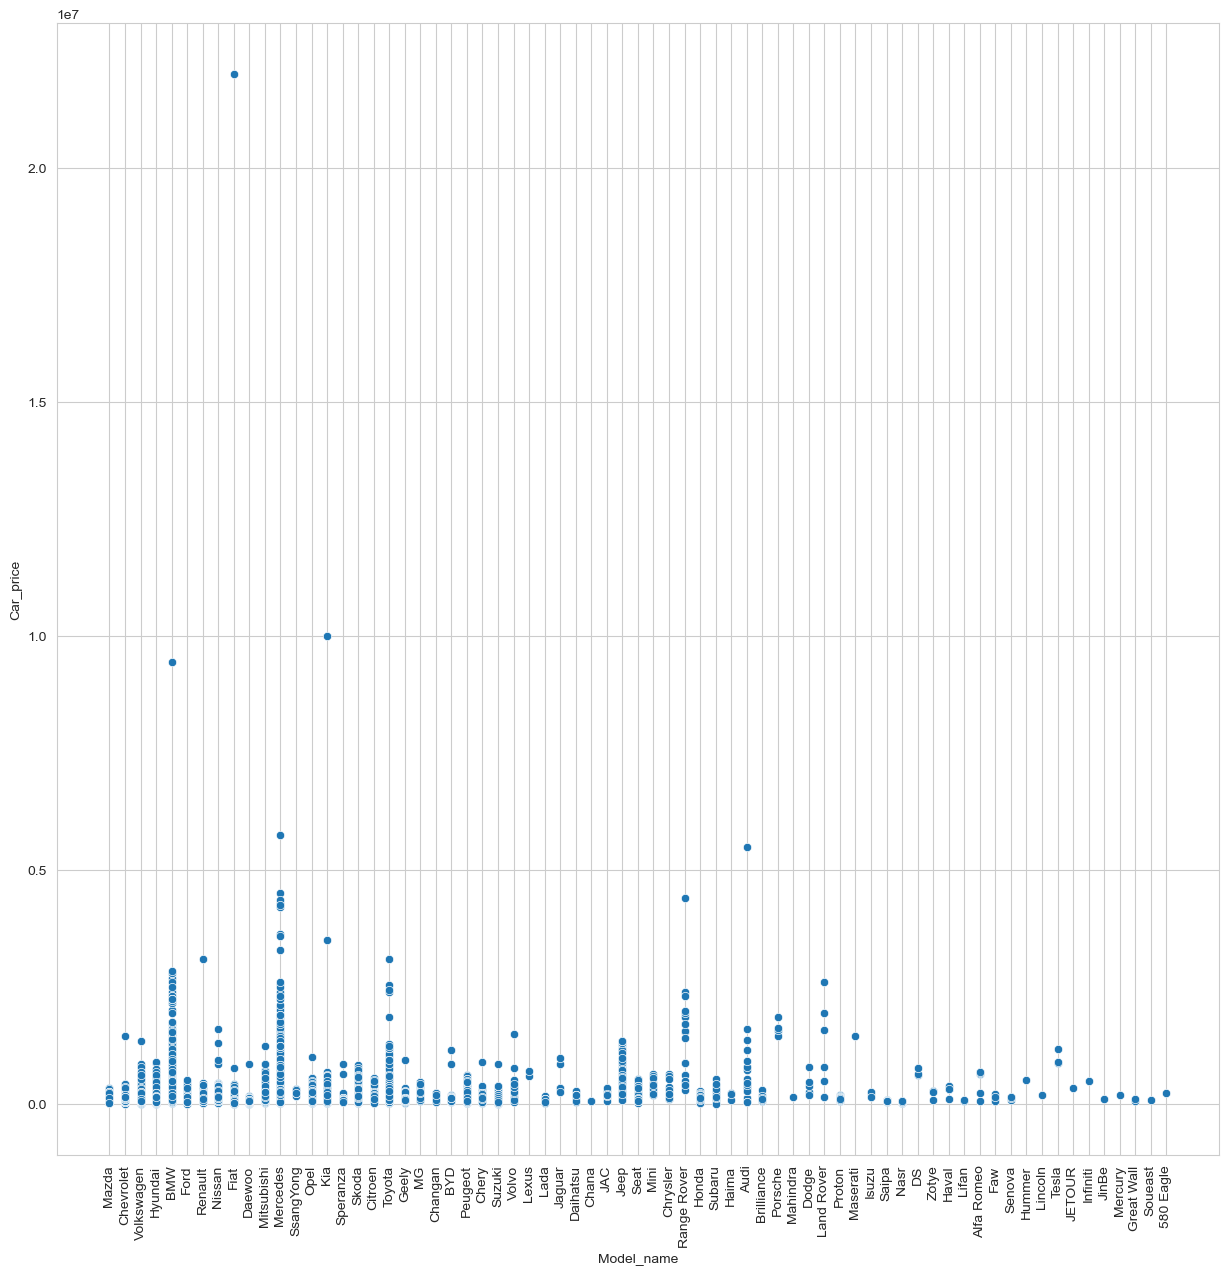

In [32]:
#checking outliers for car prices with it's models
plt.figure(figsize=(15,15),dpi=100);
sns.scatterplot(x='Model_name',y='Car_price',data=df);
plt.xticks(rotation=90);

In [33]:
#Cars prices outliers
outlier_treatment(df['Car_price'])

(-142500.0, 445500.0)

As per the figure above and after looking further into the car prices column and the statistics of our numerical columns we found out that some sellers post unrealistic prices(180,150,220000000,...) just to fill the section of the car price in the Ad.

So as per our understanding of the market We will keep as a starter the cars prices in the dataset from 10,000 till 1,000,000 because this is most likely the figures that represent the cars prices in our market.

In [34]:
#Eliminating outliers
df=df[(df['Car_price']>10000) & (df['Car_price']<1000000)]

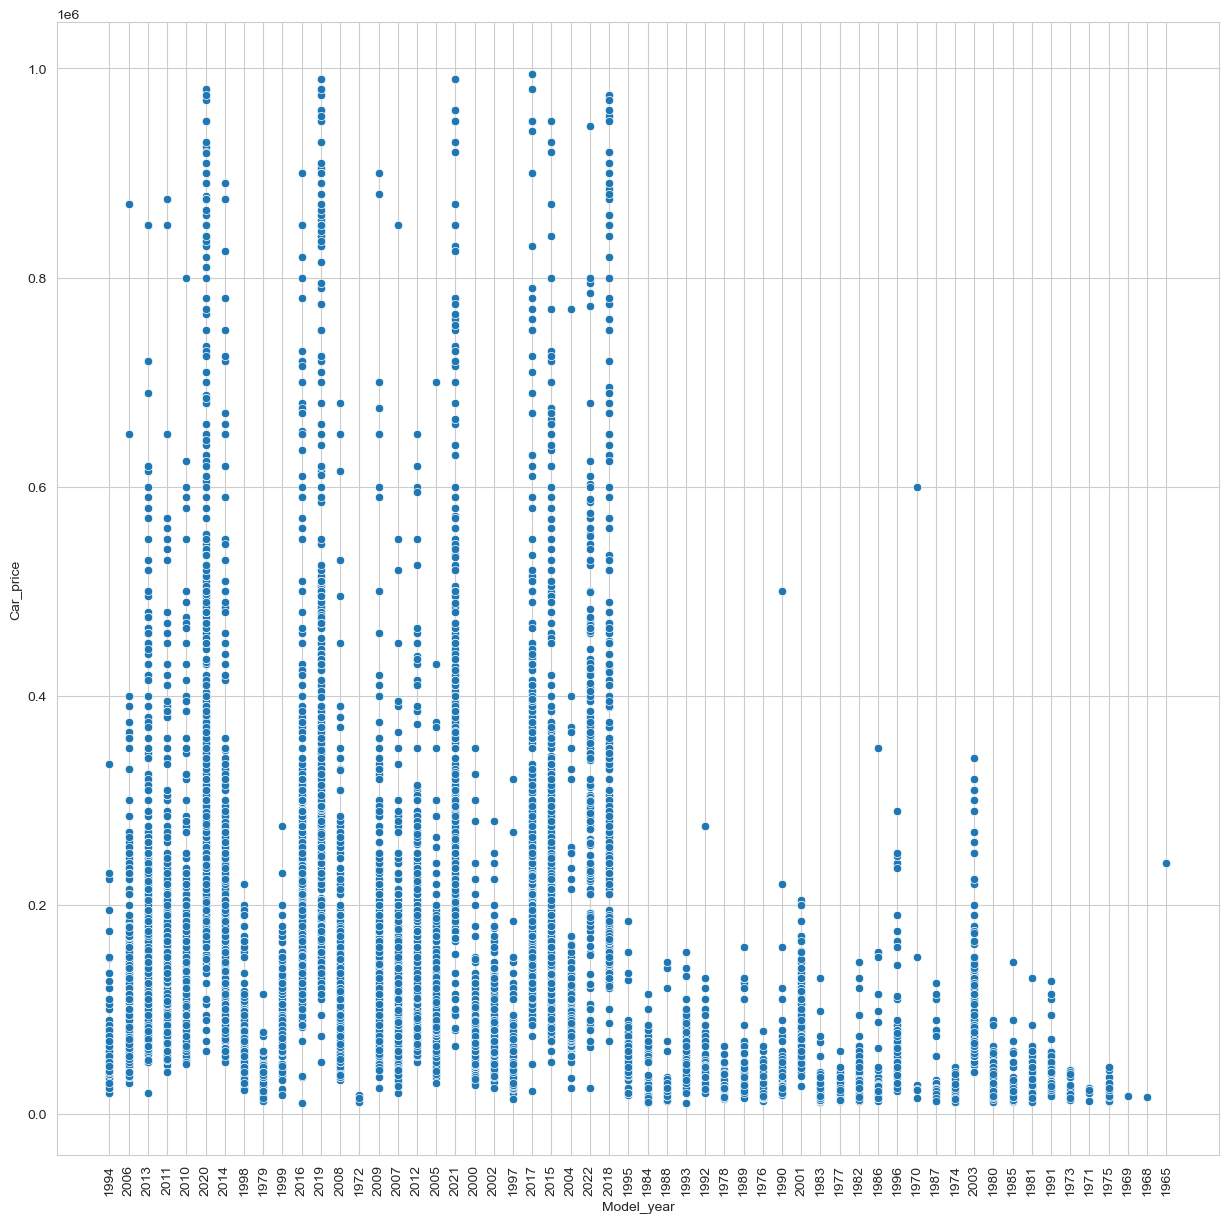

In [35]:
#checking outliers for car prices with it's model years
plt.figure(figsize=(15,15),dpi=100);
sns.scatterplot(x='Model_year',y='Car_price',data=df);
plt.xticks(rotation=90);

It seems that some prices are not priced logically relative to their model years as we can see, there are some cars with model years of 1965 but the car price is so high , so either the car is some kind of an antique that only collectors would pay that amount of money for which is something that would have been mentioned in the description column or it has been wrongly priced.

So let's investigate that in the cell bellow,  we will fitler these specific cars .

In [36]:
#checking high prices
df[(df['Car_price']>100000)&(df['Model_year']<'1995')]

,Mobile_number,Model_name,SubModel_name,Car_description,Kilometers_crossed,Car_price,Model_year,Body_type,Transmission_type,Motor_capacity,Car_color,Waranty_condition,car_key,Analoge_Air_Condition,Rear_parking_sensors,Rear_view_camera,Leather_Seats,Electronic_window,Multi_function_steering_wheel,Paddle_shifters,Front_parking_sensors,Front_Camera,Sun_Roof,Panorama_roof,Power_mirror,Aux,Bluetooth,USB,Touch_screen,Navigation_System,Tire_Pressure_Monitoring_TPMS,Electronic_Stability_Program_ESP,Anti_Lock_Braking_System_ABS,Cruise_Control,Air_Bags_For_Driver,Air_Bags_Passenger,Side_Airbags,Traction_Control,Area,Governorate,week_day,Month,accident,Payment_option,Car_paint_final
90,01008174403,Mercedes,Mercedes C180,مرسدس سي ١٨٠ موديل ١٩٩٣ رخصة باسمي,19999,110000,1993,Sedan,Automatic,2000 cc,Silver,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Ain Shams,Cairo,Sunday,October,Not available,Cash,Not available
138,01000199886,Mercedes,Mercedes C200,زلموكة 200 فبريكا برا وجوا بدانات المصنع بالكامل جميع الكماليات كهربا معادا فتحة سقف نظام فرامل مانع الانزلاق abs كراسي كهربا مخادع كهربا تكييف تاتش طارة كهربا مرايات كهربا زجاج كهربا فوانيس شبورة كاوتش جديد بطارية بالضمان رخصة سنة \n عربية ماشاء الله ربنا يبارك لصاحب النصيب والله,139999,220000,1990,Sedan,Automatic,2000 cc,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Fayoum,Wednesday,October,Not available,Cash,Factoty Paint
384,01220239979,BMW,BMW 318i,Not available,230000,120000,1994,Sedan,Automatic,2000 cc,Blue,Not available,Not available,Not available,Not available,Rear view camera,Leather Seats,Electronic Window,Not available,Not available,Not available,Not available,Not available,Not available,Power mirror,AUX,Bluetooth,USB,Touch screen,Not available,Not available,Not available,Anti-Lock Braking System (ABS),Not available,Air Bags For Driver,Air Bags Passenger,Not available,Not available,Port Fouad,Port Said,Sunday,October,Not available,Cash,Factoty Paint
695,01096079602,Mercedes,Mercedes E200,سيارة نظيفة وركوبه متعة تتاج مصاريف خفيفة او شوية اصلاحات بسيطة ان شاء الله والمعاينة خير دليل والسيارة تاني يد من المالك وكانت يعتبر ما بتمشيش او مرفوعة بمعنى اصح,29999,160000,1989,Sedan,Automatic,2000 cc,Navy Blue,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Mansoura,Dakahlia,Saturday,October,Not available,Cash,Not available
774,01019915535,BMW,BMW 316i,البيع لدواعى السفر دواخل فابريكة فق,29999,120000,1994,Sedan,Automatic,1600 cc,Green,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Cairo,Monday,October,Not available,Cash,Factoty Paint
802,01276915193,Mercedes,Mercedes A200,عربية مرسيدس زموكة للبيع موديل 1989ايه 200 مطلوب 125000الف قابل للتفاوض البسيط عن

The below prices don't seem logical so we will remove them

In [37]:
df.drop(index=2462,inplace=True)
df.drop(index=11744,inplace=True)
df.drop(index=4045,inplace=True)
df.drop(index=6188,inplace=True)
df.drop(index=4713,inplace=True)
df.drop(index=5818,inplace=True)

In [38]:
#checking low prices for some early years cars cars
df[(df['Car_price']<50000)&(df['Model_year']>='2013')]

,Mobile_number,Model_name,SubModel_name,Car_description,Kilometers_crossed,Car_price,Model_year,Body_type,Transmission_type,Motor_capacity,Car_color,Waranty_condition,car_key,Analoge_Air_Condition,Rear_parking_sensors,Rear_view_camera,Leather_Seats,Electronic_window,Multi_function_steering_wheel,Paddle_shifters,Front_parking_sensors,Front_Camera,Sun_Roof,Panorama_roof,Power_mirror,Aux,Bluetooth,USB,Touch_screen,Navigation_System,Tire_Pressure_Monitoring_TPMS,Electronic_Stability_Program_ESP,Anti_Lock_Braking_System_ABS,Cruise_Control,Air_Bags_For_Driver,Air_Bags_Passenger,Side_Airbags,Traction_Control,Area,Governorate,week_day,Month,accident,Payment_option,Car_paint_final
1238,01120081803,Fiat,Fiat 131,بسعر 22 الف\n قابل للتفاوض \nالمعينه في الزقازيق\n موقف الزراعة \nليست للبدل ولا بيع قسط البيع كا,39999,22000,2017,Sedan,Manual,1300 cc,Red,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Sharabia,Cairo,Monday,October,Not available,Installment,Not available
2166,0222402545,Suzuki,Suzuki Spresso,أقوى العروض مع القرش وبس للزيرو\nباقل مقم استلام فورى فى اقل من 24 ساعه \nسوزوكى التو 25 الف مقدم\nلادا جرنتا او شنجان السفين 35 الف مقدم\nسوزوكي دزاير او رينو لوجان 45 الف مقدم\nMG5 او بيجو 301 55 الف مقدم\nلمزيد من التفاصيل كلمنا على 01202226208\n*تطبق الشروط والاحكام\n#سيارات_القرش_اختيارات_بلا_حدود,50,25000,2022,SUV,Manual,1000 cc,Not available,Not available,Not available,Analoge Air Condition,Rear parking sensors,Not available,Not available,Electronic Window,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Bluetooth,USB,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Heliopolis,Cairo,Sunday,October,Not available,Cash,Factoty Paint
3541,01222415275,Lada,Lada Granta,لادا جرانتا ٢١٦ عفشه وماتور بحالة جيدة جداً\nمطلوب ٣٥٠٠٠ نهائي \nتكملة أقساط باقي ٢٣ شهر \nالقسط ٢٦٠٠,236550,35000,2016,Sedan,Manual,1600 cc,Maroon,Not available,Not available,Analoge Air Condition,Not available,Not available,Leather Seats,Electronic Window,Not available,Not available,Not available,Not available,Not available,Not available,Not available,AUX,Bluetooth,USB,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Sadat City,Monufia,Tuesday,October,Not available,Installment,Factoty Paint
7513,01151913406,Suzuki,Suzuki Van,عربي مرور الوراق رخصه لحد شهر ٣.. ٢٠٢٢ بدهان المصنع ما عدا مرمه في الرفرف جنوط أعرض من بلادها بطاريه جديده لم يتم حل اي مسمار في العربيه غير الصيانه المنتظمه,79999,10200,2016,Sedan,Manual,3000 cc,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Warraq,Giza,Sunday,October,Not available,Cash,Not available
8445,01062841136,Audi,Audi A3,For sale Audi hatchback topline Model 2016 \nOriginal paint without scratches \nAll services done at Audi service center\nSilver X grey \nZero condition \nللبيع audi a3 توب لاين فابريكة بالكامل من الداخل و الخارج من الاكصدام للاكصدام اللون فضي فرش رمادي و جميع الصيانات بالتوكيل بالفواتير و العربية استعمال راقي جدا شبة لم تستخدم عداد 91000 كم,91000,36000,2016,Hatchback,Automatic,1400 cc,Silver,In Warranty,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not ava

Some of the cars have installments plan so we will leave them and remove the unlogically priced cars

In [39]:
df.drop(index=7513,inplace=True)
df.drop(index=8445,inplace=True)
df.drop(index=10457,inplace=True)
df.drop(index=10683,inplace=True)

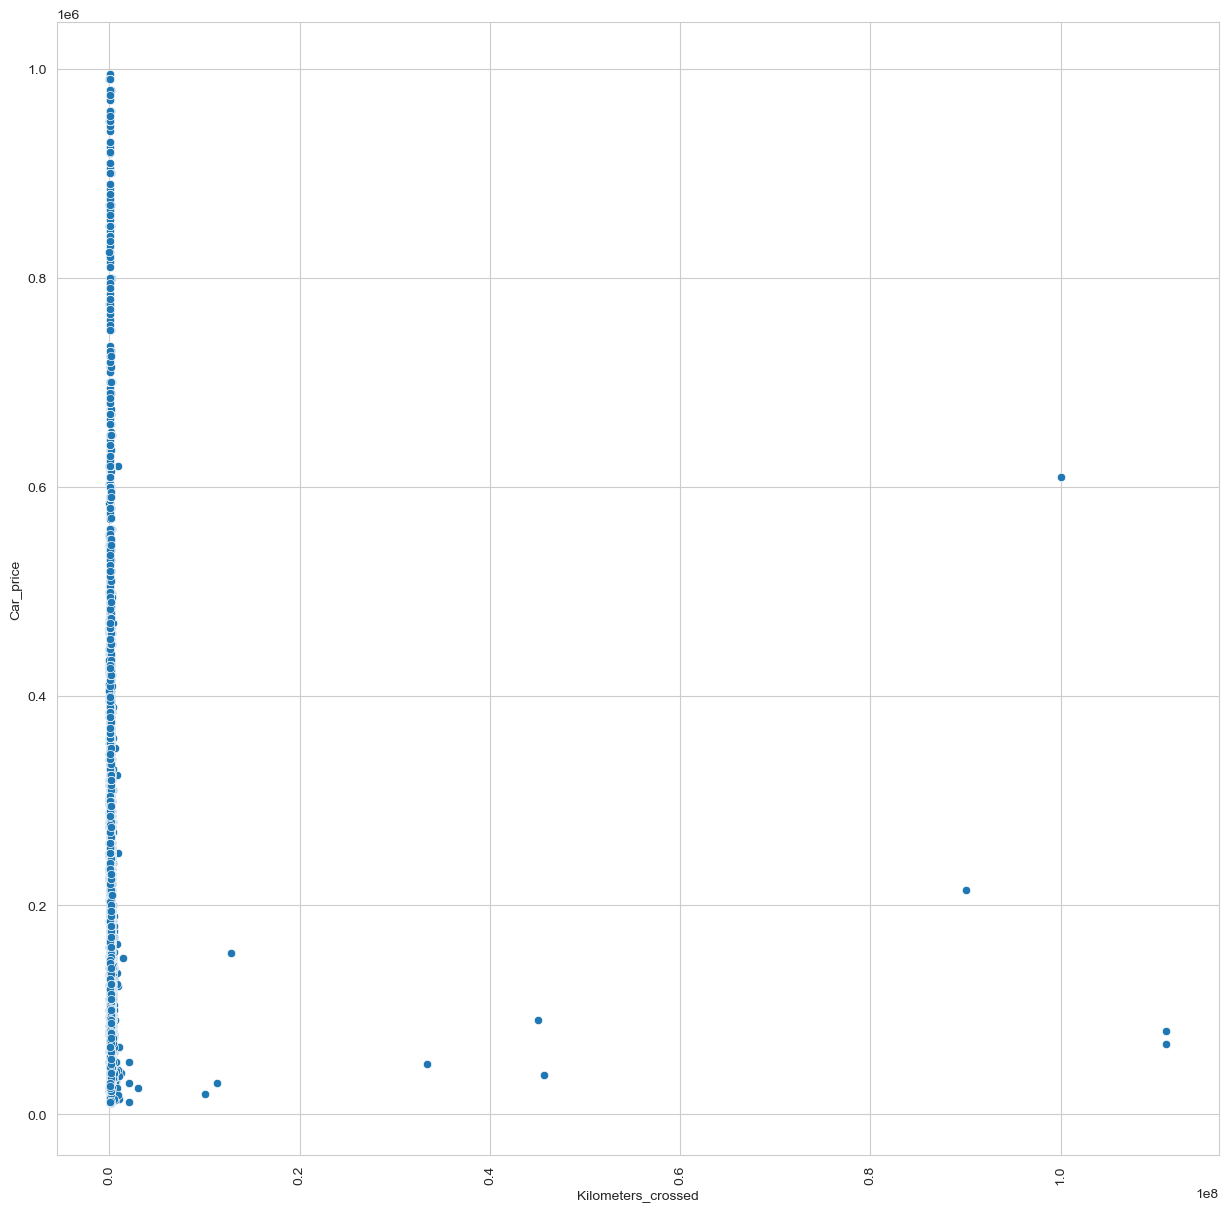

In [40]:
#checking outliers for car prices with it's Kilometer
plt.figure(figsize=(15,15),dpi=100);
sns.scatterplot(x='Kilometers_crossed',y='Car_price',data=df);
plt.xticks(rotation=90);

As we can see there are Some cars that have high kilometers number over than 600,000 but with very high prices

We will remove any number of kilometers less than 1000 which doesn't represent a used car category and more than 600,000 because it is most likely the highest number of kilometers crossed by a car in our country

In [41]:
#Eliminating outliers
df=df[(df['Kilometers_crossed']>1000) & (df['Kilometers_crossed']<600000)]

We have now eliminated the general obvious outliers in the data

Moving on to the next step in outliers handling

Since the pricing of these Ads are made by random individuals and each seller can price his car as he likes , we can find alot of unreasonable prices for cars that doesn't represent the fair price of it's features or condition so in order to fix that i create a function that iterates throught each model name,submodel,model year,Motor capacity and calculate the median price of these prices and replace the outliers with it.

Note: We chose median because it is not affected by outliers unlike mean

For an example we will Check a specific car that has the same Model_name , SubModel_name , Model_year , Motor_capacity as shown below

In [42]:
df[(df['Model_name']=='Chevrolet')&(df['SubModel_name']=='Chevrolet Lanos')&(df['Model_year']=='2015')&(df['Motor_capacity']=='1500 cc')]

,Mobile_number,Model_name,SubModel_name,Car_description,Kilometers_crossed,Car_price,Model_year,Body_type,Transmission_type,Motor_capacity,Car_color,Waranty_condition,car_key,Analoge_Air_Condition,Rear_parking_sensors,Rear_view_camera,Leather_Seats,Electronic_window,Multi_function_steering_wheel,Paddle_shifters,Front_parking_sensors,Front_Camera,Sun_Roof,Panorama_roof,Power_mirror,Aux,Bluetooth,USB,Touch_screen,Navigation_System,Tire_Pressure_Monitoring_TPMS,Electronic_Stability_Program_ESP,Anti_Lock_Braking_System_ABS,Cruise_Control,Air_Bags_For_Driver,Air_Bags_Passenger,Side_Airbags,Traction_Control,Area,Governorate,week_day,Month,accident,Payment_option,Car_paint_final
963,01146160112,Chevrolet,Chevrolet Lanos,لانوس ٢٠١٥ ابريكا براوجوا معادا جنب يمين كاوتش وبطاريه من شهر فاميه علي الرخصه مش محتاجه جنيه مصروف,19999,87000,2015,Sedan,Manual,1500 cc,Silver,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Shubra Al Khaimah,Qalyubia,Monday,October,Not available,Cash,Not available
997,01143007037,Chevrolet,Chevrolet Lanos,سيارة فبريكه بالكامل بره ووه مفهاش اي جرام بويا ومستعد للكشف في اي مكان علي السيارة والسياره بها ٤ زجاج كهرباء وتكييف ثلاجه وبها الكاسيت لموديل ٢٠١٦وتم تغيير جميع السيور والزيوت وتم تغيير طقم كهرباء بالاسلاك ( بوجيهات المتور ) وبالجمله تم عمل سرفيس كامل للسيارة وتم تغيير ٤ فرد كاوتش من حوالي ٨ شهور تقريبا وتم تغيير بطاريه السيارة ولاتزال البطاريه بالضمان وتم تركيب فرش وارضيه وشنطه جلد من تاريخ شرائها \nالسيارة لا تحتاج اي مصاريف نهائيا \nالسيارة مرور الشرقيه ( الزقازيق ) وبها رخصه ٩ اشهر \nلون السيارة فيراني \nالسيارة ماشيه ٧٨ الف كيلو \nالسعر ١٢٠ الف جنيها ويوجد تفاوض بسيط جدا بعد المعاينه التجار يمتنعون منعا للاحراج,79999,120000,2015,Sedan,Manual,1500 cc,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Sharabia,Cairo,Wednesday,October,Not available,Cash,Factoty Paint
1160,01126423090,Chevrolet,Chevrolet Lanos,انوس 2015فبريكه بره وجوه ماشيه 125الف كم لا تحتاج لاي مصاريف جميع الصيانه في التوكيل بي الاوراق مطلوب 105.000قابل لي التفاوض البيع بي عقد مسجل,125000,105000,2015,Sedan,Manual,1500 cc,Gray,Not available,Not available,Analoge Air Condition,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Air Bags For Driver,Not available,Not available,Not available,North Giza,Not available,Monday,October,Not available,Cash,Factory Paint
1733,01126659510,Chevrolet,Chevrolet Lanos,شيفورليه لانوس 2015 اول يد فبريكا بالكامل \nالسياره بحالاتها بعلامات الفبريكا لم يفك منها مسمار \n لا تحتاج مصروف جنيه \nصيانات منتظمه من الزيرو في التوكيل و المراكز المعتمده \nكاويتش جديد \nبطاريه جديده \nلا تحتاج اي مصروف,50000,122000,2015,Sedan,Manual,1500 cc,Silver,In Warranty,Not available,Analoge Air Condition,Not available,Not available,Not available,Electronic Window,Not available,Not available,Not available,Not available,Not available,Not available,Not available,AUX,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Nasr City,Cairo,Wednesday,October,Not available,Cash,Factory Paint
2073,01061613735,Chevrolet,Chevrolet Lanos,حاله جيدا رشه جاب

As we can see ubove in the first car index of 963 the car price is 85,000 which is lower than the Median of the rest of the car prices and is considered as an outlier, so we will apply our loop and check the results

In [43]:
# Now we will run the outliers handling loop
for index, row in df.iterrows():
    d=df[(df['Model_name']==row['Model_name'][0:])&(df['SubModel_name']==row['SubModel_name'][0:])&(df['Model_year']==row['Model_year'][0:])&(df['Motor_capacity']==row['Motor_capacity'][0:])&(df['accident']==row['accident'][0:])]
    p=d['Car_price'].median()
    sorted(d['Car_price'])
    Q1,Q3 = np.percentile(d['Car_price'] , [25,75])
    IQR = Q3 - Q1
    lower_rangeCar_price = Q1 - (1.5 * IQR)
    upper_rangeCar_price = Q3 + (1.5 * IQR)
    if row['Car_price'] < lower_rangeCar_price:
        df.at[index,'Car_price']=p
    elif row['Car_price'] > upper_rangeCar_price:
        df.at[index,'Car_price']=p

In [44]:
#checking results on the same type of car
df[(df['Model_name']=='Chevrolet')&(df['SubModel_name']=='Chevrolet Lanos')&(df['Model_year']=='2015')&(df['Motor_capacity']=='1500 cc')]

,Mobile_number,Model_name,SubModel_name,Car_description,Kilometers_crossed,Car_price,Model_year,Body_type,Transmission_type,Motor_capacity,Car_color,Waranty_condition,car_key,Analoge_Air_Condition,Rear_parking_sensors,Rear_view_camera,Leather_Seats,Electronic_window,Multi_function_steering_wheel,Paddle_shifters,Front_parking_sensors,Front_Camera,Sun_Roof,Panorama_roof,Power_mirror,Aux,Bluetooth,USB,Touch_screen,Navigation_System,Tire_Pressure_Monitoring_TPMS,Electronic_Stability_Program_ESP,Anti_Lock_Braking_System_ABS,Cruise_Control,Air_Bags_For_Driver,Air_Bags_Passenger,Side_Airbags,Traction_Control,Area,Governorate,week_day,Month,accident,Payment_option,Car_paint_final
963,01146160112,Chevrolet,Chevrolet Lanos,لانوس ٢٠١٥ ابريكا براوجوا معادا جنب يمين كاوتش وبطاريه من شهر فاميه علي الرخصه مش محتاجه جنيه مصروف,19999,110000,2015,Sedan,Manual,1500 cc,Silver,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Shubra Al Khaimah,Qalyubia,Monday,October,Not available,Cash,Not available
997,01143007037,Chevrolet,Chevrolet Lanos,سيارة فبريكه بالكامل بره ووه مفهاش اي جرام بويا ومستعد للكشف في اي مكان علي السيارة والسياره بها ٤ زجاج كهرباء وتكييف ثلاجه وبها الكاسيت لموديل ٢٠١٦وتم تغيير جميع السيور والزيوت وتم تغيير طقم كهرباء بالاسلاك ( بوجيهات المتور ) وبالجمله تم عمل سرفيس كامل للسيارة وتم تغيير ٤ فرد كاوتش من حوالي ٨ شهور تقريبا وتم تغيير بطاريه السيارة ولاتزال البطاريه بالضمان وتم تركيب فرش وارضيه وشنطه جلد من تاريخ شرائها \nالسيارة لا تحتاج اي مصاريف نهائيا \nالسيارة مرور الشرقيه ( الزقازيق ) وبها رخصه ٩ اشهر \nلون السيارة فيراني \nالسيارة ماشيه ٧٨ الف كيلو \nالسعر ١٢٠ الف جنيها ويوجد تفاوض بسيط جدا بعد المعاينه التجار يمتنعون منعا للاحراج,79999,120000,2015,Sedan,Manual,1500 cc,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Sharabia,Cairo,Wednesday,October,Not available,Cash,Factoty Paint
1160,01126423090,Chevrolet,Chevrolet Lanos,انوس 2015فبريكه بره وجوه ماشيه 125الف كم لا تحتاج لاي مصاريف جميع الصيانه في التوكيل بي الاوراق مطلوب 105.000قابل لي التفاوض البيع بي عقد مسجل,125000,105000,2015,Sedan,Manual,1500 cc,Gray,Not available,Not available,Analoge Air Condition,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Air Bags For Driver,Not available,Not available,Not available,North Giza,Not available,Monday,October,Not available,Cash,Factory Paint
1733,01126659510,Chevrolet,Chevrolet Lanos,شيفورليه لانوس 2015 اول يد فبريكا بالكامل \nالسياره بحالاتها بعلامات الفبريكا لم يفك منها مسمار \n لا تحتاج مصروف جنيه \nصيانات منتظمه من الزيرو في التوكيل و المراكز المعتمده \nكاويتش جديد \nبطاريه جديده \nلا تحتاج اي مصروف,50000,122000,2015,Sedan,Manual,1500 cc,Silver,In Warranty,Not available,Analoge Air Condition,Not available,Not available,Not available,Electronic Window,Not available,Not available,Not available,Not available,Not available,Not available,Not available,AUX,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Nasr City,Cairo,Wednesday,October,Not available,Cash,Factory Paint
2073,01061613735,Chevrolet,Chevrolet Lanos,حاله جيدا رشه جا

Now as we can see the car with index of 963 it's price has been changed to 110000 which is the median price of the same car with the same features

## Handling Missing data

Now let's move to the Not available values , since i scraped the data myself from the internet and i made sure to replace any missing values with "Not available" instead of null valuesو i will search for the Not availabe values inside each column instead of nan values and investigate the reason for it's inexistence , if it's logical and expresses the condition of the car then we will use it as it is in our model , if it's not then we will fix it.

In [45]:
# How many Not Available strings in each column
count_missing_Transactions = df[df=='Not available'].count()
percent_missing_Transactions = round(df[df=='Not available'].count()/len(df) * 100, 1)
missing_Transactions = pd.concat([count_missing_Transactions, percent_missing_Transactions], axis = 1)
missing_Transactions.columns = ["Missing (count)", "Missing (%)"]
missing_Transactions.sort_values(by="Missing (%)",ascending=False)

,Missing (count),Missing (%)
Front_Camera,10805,100.00
Navigation_System,10805,100.00
Front_parking_sensors,10805,100.00
Tire_Pressure_Monitoring_TPMS,10805,100.00
Electronic_Stability_Program_ESP,10805,100.00
Multi_function_steering_wheel,10805,100.00
Paddle_shifters,10805,100.00
accident,10771,99.70
Panorama_roof,10412,96.40
Traction_Control,10391,96.20


Observations:

- We are going to remove missing column more than 96% from our dataset since it's not going to benefit us and use the rest of the information
 
- We don't have missing values in the main features such as (Mobile number) which is the unique identifier for each AD and (Model name,Sub model name)

- I will remove the Governorates that are missing and leave the missing areas and colors and check the model accuracy

In [46]:
#dropping more that 96% percent columns 
df.drop(['Front_Camera','Multi_function_steering_wheel','Front_parking_sensors','Navigation_System','Tire_Pressure_Monitoring_TPMS','Electronic_Stability_Program_ESP','Paddle_shifters','accident'],axis=1,inplace=True)

In [47]:
df=df[df['Governorate'] != 'Not available']

Now checking results

In [48]:
# How many Not Available strings in each column
count_missing_Transactions = df[df=='Not available'].count()
percent_missing_Transactions = round(df[df=='Not available'].count()/len(df) * 100, 1)
missing_Transactions = pd.concat([count_missing_Transactions, percent_missing_Transactions], axis = 1)
missing_Transactions.columns = ["Missing (count)", "Missing (%)"]
missing_Transactions.sort_values(by="Missing (%)",ascending=False)

,Missing (count),Missing (%)
Panorama_roof,10136,96.60
Traction_Control,10124,96.50
Touch_screen,10024,95.50
Waranty_condition,9979,95.10
Side_Airbags,9905,94.40
car_key,9818,93.60
Sun_Roof,9789,93.30
Rear_view_camera,9769,93.10
Cruise_Control,9446,90.00
Rear_parking_sensors,9329,88.90


### Duplicates Handling

In [49]:
df[(df.duplicated())]

,Mobile_number,Model_name,SubModel_name,Car_description,Kilometers_crossed,Car_price,Model_year,Body_type,Transmission_type,Motor_capacity,Car_color,Waranty_condition,car_key,Analoge_Air_Condition,Rear_parking_sensors,Rear_view_camera,Leather_Seats,Electronic_window,Sun_Roof,Panorama_roof,Power_mirror,Aux,Bluetooth,USB,Touch_screen,Anti_Lock_Braking_System_ABS,Cruise_Control,Air_Bags_For_Driver,Air_Bags_Passenger,Side_Airbags,Traction_Control,Area,Governorate,week_day,Month,Payment_option,Car_paint_final
1197,01551357266,BYD,BYD F3,حالة شاذة استخدام شخصي ماشية 81 الف فبريكة دواخل رخصة سنة كاوتش جديد بطارية جديدة فرش جلد تفصيل لسة معمول غاز حقن خالص معاينة فى التجمع الخامس ععند مسجد فاطمه الشربتلى بعد,81000,148000,2019,Sedan,Manual,1500 cc,Blue,Not available,Not available,Analoge Air Condition,Not available,Not available,Leather Seats,Electronic Window,Not available,Not available,Power mirror,AUX,Not available,Not available,Not available,Anti-Lock Braking System (ABS),Not available,Air Bags For Driver,Air Bags Passenger,Not available,Not available,New Kairo,Cairo,Tuesday,October,Cash,Factory Paint
3223,01000612078,Nissan,Nissan Sunny,العربيه فبريكا بالكامل عداد ١٦٣٠٠٠\nبها تريحه في الاكصدام الخلفي\nوالفبريكا بتعها رخصه سنه كاوتش\nوبطارية جديده الفون ٠١٠٠٠٦١٢٠٧,163000,132000,2010,Sedan,Automatic,1500 cc,Black,Not available,Not available,Analoge Air Condition,Not available,Not available,Leather Seats,Electronic Window,Not available,Not available,Power mirror,AUX,Bluetooth,USB,Not available,Not available,Not available,Air Bags For Driver,Not available,Not available,Not available,Heliopolis,Cairo,Wednesday,October,Cash,Factory Paint
3269,01278363919,Mercedes,Mercedes E200,#T_AUTO \n\n🎩🎩🎩🎩🎩🎩\n\n#Mercedes_E200 🔛Avantgarde \n\nModel 2015 \n\n130.000 Km كاوتش جديد ⚙️صيانات منتظمة\n\n✅السيارة فابريكة بالكامل عدا الاكصدامين اللون اسود فرش اسود \n\n🚦رخصه سنه مرور القاهرة الجديدة \n\n700.000 EGP 💰💰\n\n📍المعاينه : 88 عمار بن ياسر - الكليه الحربيه - مصر الجديدة \n\nللتواصل 📞📞: \n\n�01096961716📱\n📱01278363919📱,130000,700000,2015,Sedan,Automatic,2000 cc,Black,Not available,Not available,Analoge Air Condition,Rear parking sensors,Not available,Leather Seats,Electronic Window,Sun Roof,Panorama Roof,Power mirror,AUX,Bluetooth,USB,Not available,Anti-Lock Braking System (ABS),Cruise Control,Air Bags For Driver,Air Bags Passenger,Not available,Not available,Heliopolis,Cairo,Monday,October,Cash,Factory Paint
3943,01000900229,Daewoo,Daewoo Matiz,ماتيز اوتوماتيك زجاج كهربا موتور جديد كاوتش جديد بطاريه جديده ابريقه دواخل لا تحتاج إلى مصروف,200000,60000,1999,Hatchback,Automatic,800 cc,Navy Blue,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Nasr City,Cairo,Thursday,September,Cash,Not available
4121,01005531561,Chevrolet,Chevrolet N200,للبيع سيارة ماركة شيفولية موديل N200 200\n٤ سلندر 1200 سي سي بنزين اللون ذهبي برونزي ترخيص مرور الاميرية ترخيص و فحص حتي 2024 السيارة أرضيات جلد خامات عالية وفرش للكراسي الماني ووحدة رفع زجاج أمامي والسيارة مجهزة بتشغيل التكيف والسيارة بحاله جيده جدا ماتور وعفشة وتم تجديدها سمكرة وبويات كما موضح في الصور \nبرجاء حضور متخصص او ميكانيكى عند المعاينة لعدم ضياع الوقت \nالمعاينة للجادين فقط / شبرا الخيمة بهتيم الشارع الجديد مسطرد بجوار سوبر ماركت الفرجاني الشارع الجديد\nالسعر ٨٠ الف كاش ويوجد امكانية تقسيط سعر التقسيط ١٠٠ الف ودفع مقدم 55 الف وقسط 4500 للتواصل \nالاتصال للجادين فقط والتجار والوسطاء ممتنعون ولكم جزيل الشكر\n/ 01005531561\n01005061322\n01113094531,230000,80000,2010,Van,Manual,1200 cc,Gold,Not available,Not available,Analoge Air Condition,Not available,Not available,Leather Seats,Electronic Window,Not available,Not available,Not available,AUX,Bluetooth,USB,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Shubra Al Khaimah,Qalyubia,Friday,

- The above values are for entirely duplicated rows across the dataframe which is not useful for us and we will drop

In [50]:
#dropping duplicated rows
df.drop_duplicates(inplace=True)

### Exploratory Data Analysis

Our obejctive is to Understand:

1. What are the distributions of features along the dataset
2. What are the features that affect the car prices mostly so we can use them in our ML model
 
Features that will help support our investigation:

1. Car price
2. Kilometers crossed
3. Model name
4. SubModel name	
5. Model year
6. Body type
7. Transmission type
8. Motor capacity
9. Waranty condition
10. Car paint final

### Univariate Analysis

- In this section, we will investigate distributions of individual variables along the dataset

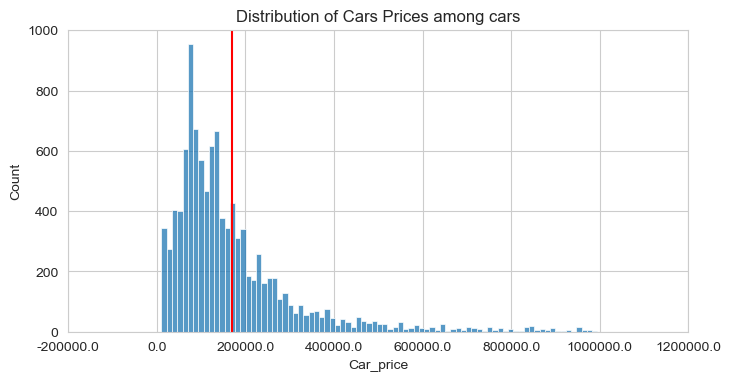

In [51]:
#Distribution of Cars Prices among cars
plt.figure(figsize=(8,4),dpi=100);
sns.histplot(df['Car_price']);
plt.axvline(df['Car_price'].mean(),color = "red")
plt.title('Distribution of Cars Prices among cars');
xx,locs=plt.xticks()
ll=['%.1f' % a for a in xx]
plt.xticks(xx,ll)
plt.xlim()
plt.show()

In [52]:
#Average car parices
df['Car_price'].mean()

169602.0247397077

**Graph Conclusion:** 
- Average Cars price is 173,238 L.E

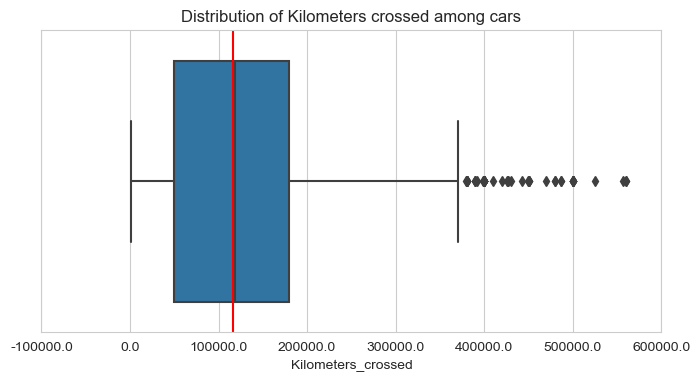

In [53]:
#Distribution of Cars Kilometers crossed among cars
plt.figure(figsize=(8,4),dpi=100);
sns.boxplot(df['Kilometers_crossed']);
plt.axvline(df['Kilometers_crossed'].mean(),color = "red")
plt.title('Distribution of Kilometers crossed among cars');
xx,locs=plt.xticks()
ll=['%.1f' % a for a in xx]
plt.xticks(xx,ll)
plt.show()

In [54]:
#Average Kilometers_crossed
df['Kilometers_crossed'].mean()

116601.02015474257

**Graph Conclusion:** 
- Average number of Kilometers crossed is 116,782 KM

Hyundai       13.23
Chevrolet      7.87
Kia            7.74
Fiat           7.24
Daewoo         5.63
Renault        5.61
Nissan         5.54
Mitsubishi     4.60
Toyota         4.36
Mercedes       4.16
Opel           4.02
BMW            3.75
Peugeot        3.62
Volkswagen     3.60
Speranza       3.18
Skoda          2.97
Suzuki         2.76
Geely          1.56
BYD            1.17
Chery          1.16
Jeep           0.78
MG             0.65
Ford           0.50
Citroen        0.49
Lada           0.35
Mazda          0.34
Daihatsu       0.31
Seat           0.31
Proton         0.26
Nasr           0.21
Subaru         0.20
Honda          0.19
Brilliance     0.18
Mini           0.15
Audi           0.14
Volvo          0.12
SsangYong      0.11
JAC            0.09
Chrysler       0.09
Saipa          0.08
Changan        0.07
Faw            0.06
Range Rover    0.06
Senova         0.05
Alfa Romeo     0.05
Zotye          0.05
Jaguar         0.05
Dodge          0.05
Haima          0.03
Isuzu          0.03


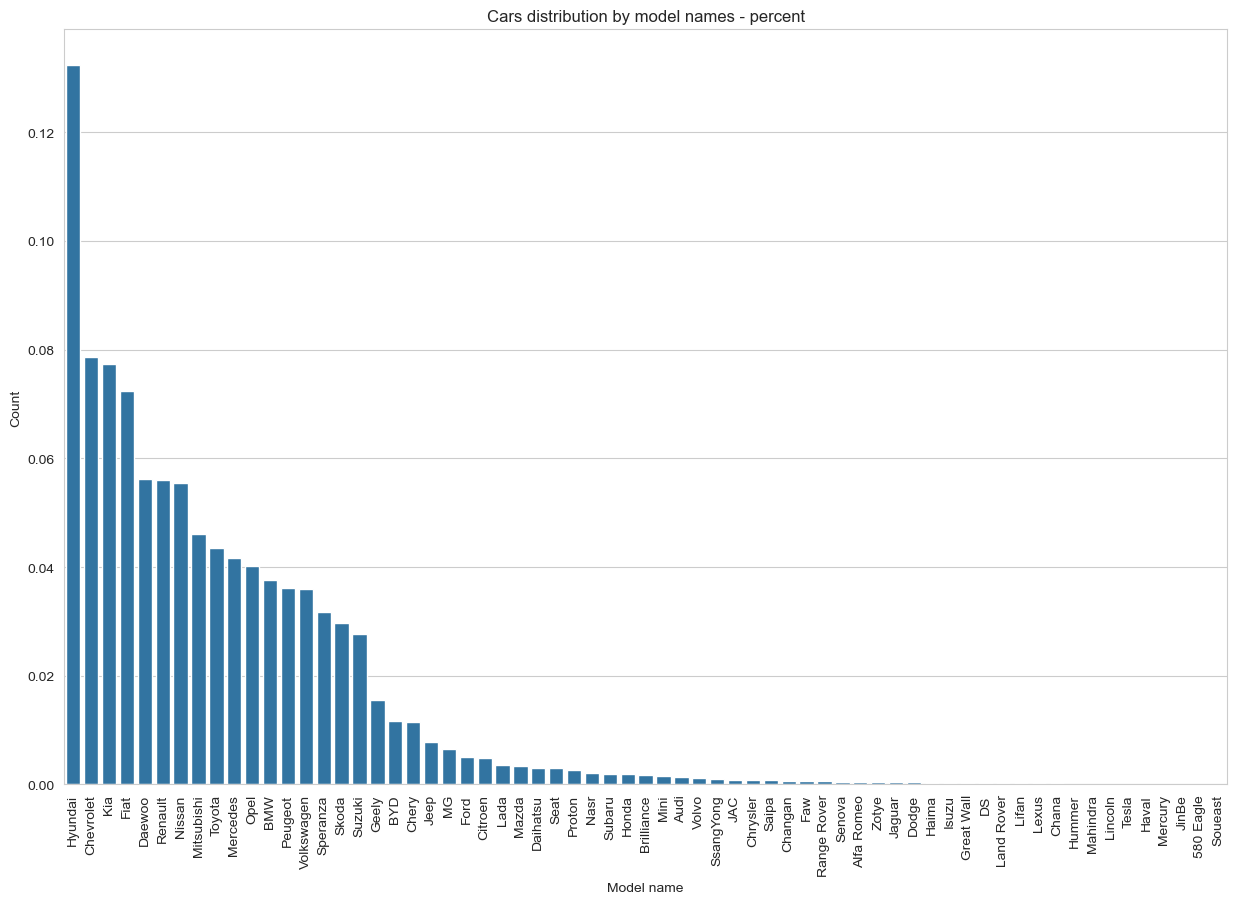

In [55]:
#Cars distribution by model names
plt.figure(figsize = (15,10), dpi = 100)
base_color = sns.color_palette()[0]

counts = df['Model_name'].value_counts(normalize = True)
sns.barplot(x = counts.index, y = counts.values, color=base_color)
plt.xlabel('Model name')
plt.xticks(rotation=90)
plt.ylabel('Count')
print(counts * 100)

plt.title("Cars distribution by model names - percent")
plt.show()

**Graph Conclusion:** 
- Most of the cars sold are The Korean cars(Huyndai,Chevrolet,Kia,Renault,Daewoo)since they are the most used type of cars in our market(due to it's good prices compared to the values and options it provides)


2015   6.45
2008   5.38
2010   5.25
2016   5.11
2007   4.79
2013   4.78
2014   4.51
2017   4.44
2011   4.32
2009   4.25
2019   4.12
2012   3.74
2006   3.61
2020   3.47
2018   2.75
1999   2.68
2005   2.49
2021   2.45
2000   2.17
2001   2.09
2004   1.96
1998   1.92
1997   1.85
2002   1.66
2003   1.49
1994   1.08
1996   1.05
1995   0.96
1979   0.72
1993   0.66
1982   0.58
1984   0.54
1980   0.48
1983   0.48
1977   0.45
2022   0.44
1986   0.44
1976   0.43
1985   0.43
1989   0.40
1987   0.39
1991   0.36
1992   0.36
1988   0.35
1990   0.34
1981   0.33
1978   0.29
1975   0.23
1974   0.17
1973   0.16
1970   0.05
1971   0.04
1972   0.04
1969   0.01
1968   0.01
Name: Model_year, dtype: float64


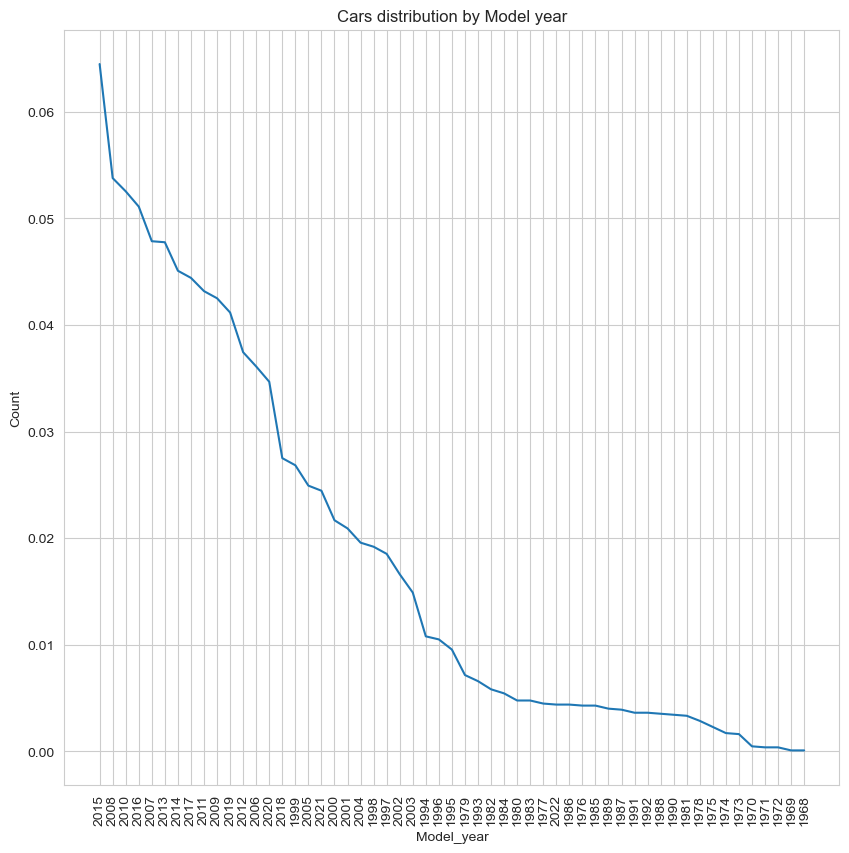

In [56]:
#Cars distribution by Model year
plt.figure(figsize = (10,10), dpi = 100)
base_color = sns.color_palette()[0]

counts = df['Model_year'].value_counts(normalize = True)
sns.lineplot(x = counts.index, y = counts.values, color=base_color)
plt.xlabel('Model_year')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.title('Cars distribution by Model year')
print(counts * 100)

**Graphic conclusion:**
- Most of the car models on the website are for 2015 year, maybe there was something specific to that year in car production we need to do more further analysis if needed


Sedan       73.69
Hatchback   15.39
SUV          8.51
Coupe        0.89
Van          0.60
Station      0.50
Cabriolet    0.42
Name: Body_type, dtype: float64


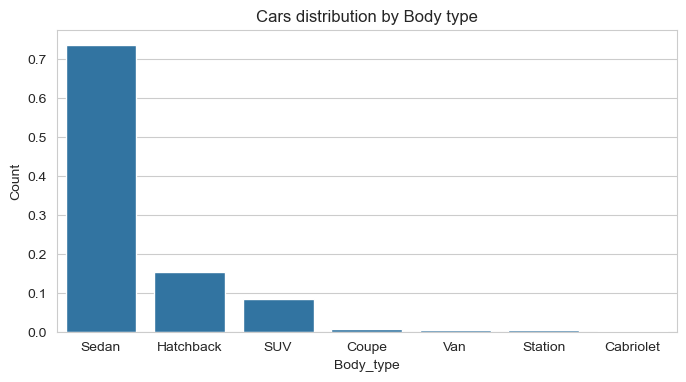

In [57]:
#Cars distribution by Body type
plt.figure(figsize = (8,4), dpi = 100)
base_color = sns.color_palette()[0]

counts = df['Body_type'].value_counts(normalize = True)
sns.barplot(x = counts.index, y = counts.values, color=base_color)
plt.xlabel('Body_type')
plt.ylabel('Count')
plt.title('Cars distribution by Body type')
print(counts * 100)

**Graphic conclusion:**
- Most of the used cars Ads are for sedan cars which is basicaly because there are more sedan cars in the market than the Hatchback and other types of body types
- Some ad posters didn't mention the Car Body type

Automatic     54.92
Manual        43.84
Dual Clutch    0.72
CVT            0.52
Name: Transmission_type, dtype: float64


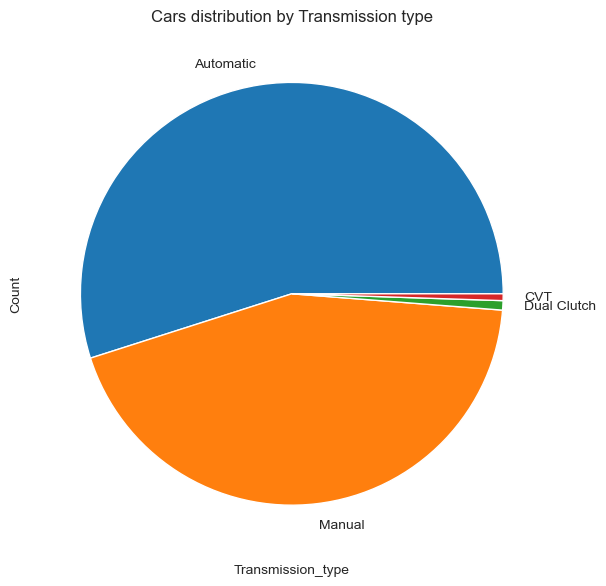

In [58]:
#Cars distribution by Transmission type
plt.figure(figsize = (8,7), dpi = 100)
base_color = sns.color_palette()[0]

counts = df['Transmission_type'].value_counts(normalize = True)
counts.plot.pie()
#sns.barplot(x = counts.index, y = counts.values, color=base_color)
plt.xlabel('Transmission_type')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.title('Cars distribution by Transmission type')
print(counts * 100)

**Graphic conclusion:**
- Most of the cars Transmission type is Automatic , the manual has almost the same percentage in the market with 43% which indicates that our market is almost divided equally between Automatic & Manual cars and so few other transmission types(CVT,Dual Clutch)


1600 cc   49.23
1500 cc   18.94
1300 cc   13.20
2000 cc    6.24
1400 cc    2.98
800 cc     1.69
3000 cc    1.31
1200 cc    1.28
2800 cc    0.98
1100 cc    0.70
1000 cc    0.62
1800 cc    0.51
2500 cc    0.37
3500 cc    0.32
3700 cc    0.25
5700 cc    0.19
3800 cc    0.17
3600 cc    0.14
4000 cc    0.11
1900 cc    0.11
3200 cc    0.10
2200 cc    0.10
2400 cc    0.08
4400 cc    0.06
2700 cc    0.06
4700 cc    0.04
5000 cc    0.04
4300 cc    0.03
6400 cc    0.03
4663 cc    0.02
4600 cc    0.02
5400 cc    0.02
2900 cc    0.01
4200 cc    0.01
6200 cc    0.01
1700 cc    0.01
5600 cc    0.01
3456 cc    0.01
3400 cc    0.01
4800 cc    0.01
Name: Motor_capacity, dtype: float64


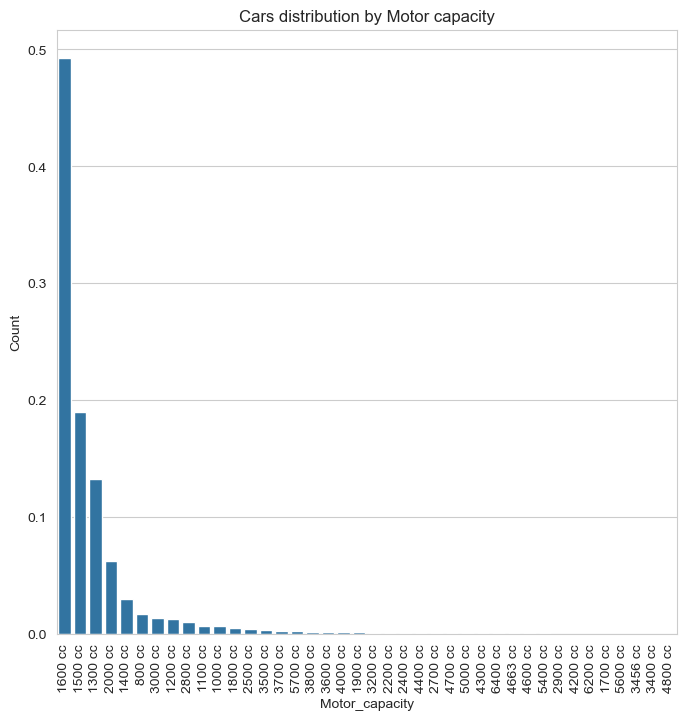

In [59]:
#Cars distribution by Motor capacity
plt.figure(figsize = (8,8), dpi = 100)
base_color = sns.color_palette()[0]

counts = df['Motor_capacity'].value_counts(normalize = True)
sns.barplot(x = counts.index, y = counts.values, color=base_color)
plt.xlabel('Motor_capacity')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.title('Cars distribution by Motor capacity')
print(counts * 100)

**Graphic conclusion:**
- Most of the Motor capacity for sale is 1600 cc
- Some Ad posters didn't mention the Motor capacity in the Ad

Not available   21.03
Black           15.56
Silver          14.18
Gray            10.65
White            9.35
Red              7.34
Navy Blue        6.79
Gold             3.05
Green            2.54
Blue             1.60
Maroon           1.60
Brown            1.50
Dark Grey        1.19
Beige            0.96
Baby Blue        0.78
Bronze           0.49
Yellow           0.42
Champagne        0.39
Orange           0.30
Purple           0.14
Turquoise        0.14
Name: Car_color, dtype: float64


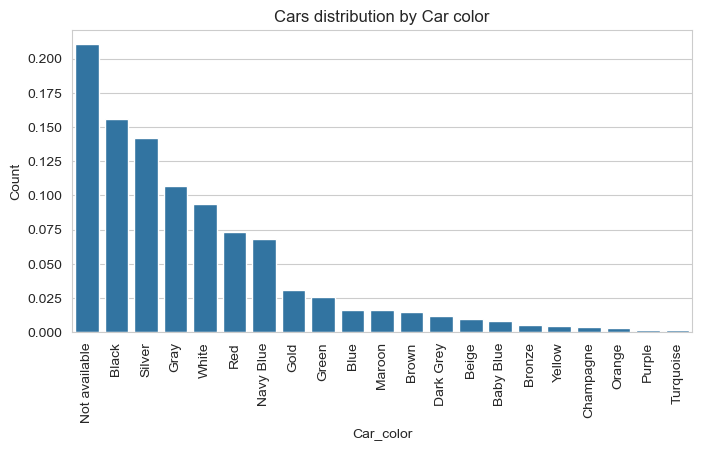

In [60]:
#Cars distribution by Car color
plt.figure(figsize = (8,4), dpi = 100)
base_color = sns.color_palette()[0]

Car_color_values=['Baby Blue','Beige','Black','Blue','Bronze','Brown','Champagne','Dark Grey','Gold','Gray','Green','Maroon','Navy Blue','Orange','Pink','Purple','Red','Silver','Turquoise','White','Yellow']

counts = df['Car_color'].value_counts(normalize = True)
sns.barplot(x = counts.index, y = counts.values, color=base_color)
plt.xlabel('Car_color')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.title('Cars distribution by Car color')
print(counts * 100)

**Graphic conclusion:**
- Most of the Ad posters didn't mention the car color
- The most colors in the cars is Black & Silverm

### Bivariate Analysis

- In this section, we will investigate relationships between pairs of variables in our data

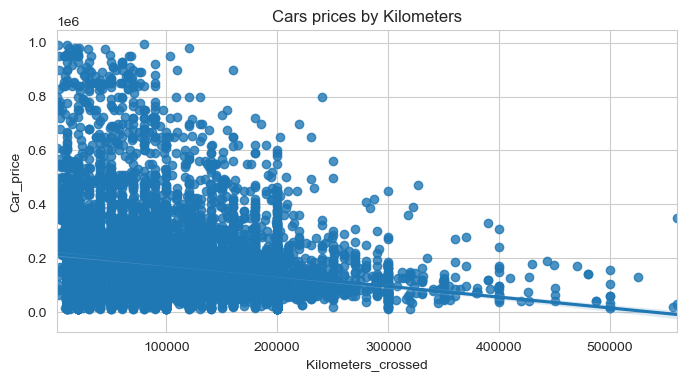

In [61]:
#Cars prices by Kilometers
plt.figure(figsize=(8,4),dpi=100);
sns.regplot(data=df,x='Kilometers_crossed',y='Car_price',color=base_color);
plt.xlabel('Kilometers_crossed');
plt.ylabel('Car_price');
plt.title('Cars prices by Kilometers');

**Graphic conclusion:**
- The Graph concludes that there is a negative correlation between the Kilometers crossed and the car prices which means the as the kilometers crossed increases the car price decreases 
- The pearson correlation between both of them is -0.217

Model_name
Tesla         900000.00
DS            675000.00
Lexus         650000.00
Range Rover   595000.00
Jaguar        556000.00
Hummer        520000.00
Land Rover    480000.00
Alfa Romeo    457600.00
Mercedes      420898.51
Jeep          416878.05
Dodge         414000.00
Audi          378533.33
BMW           377320.61
Mini          366875.00
Haval         355000.00
Chrysler      331111.11
Volvo         310769.23
MG            270284.78
SsangYong     267090.91
Subaru        233095.24
Zotye         231600.00
580 Eagle     230000.00
Toyota        224691.67
Ford          221192.31
Isuzu         214333.33
Kia           203138.58
Mercury       200000.00
Seat          191625.00
Lincoln       190000.00
JAC           189111.11
Nissan        179524.14
Opel          177008.10
Haima         175000.00
Mitsubishi    173836.10
Citroen       173470.59
Skoda         171554.66
Mazda         167111.11
Volkswagen    166471.49
Hyundai       158536.79
Honda         155950.00
Mahindra      155000.00
Renau

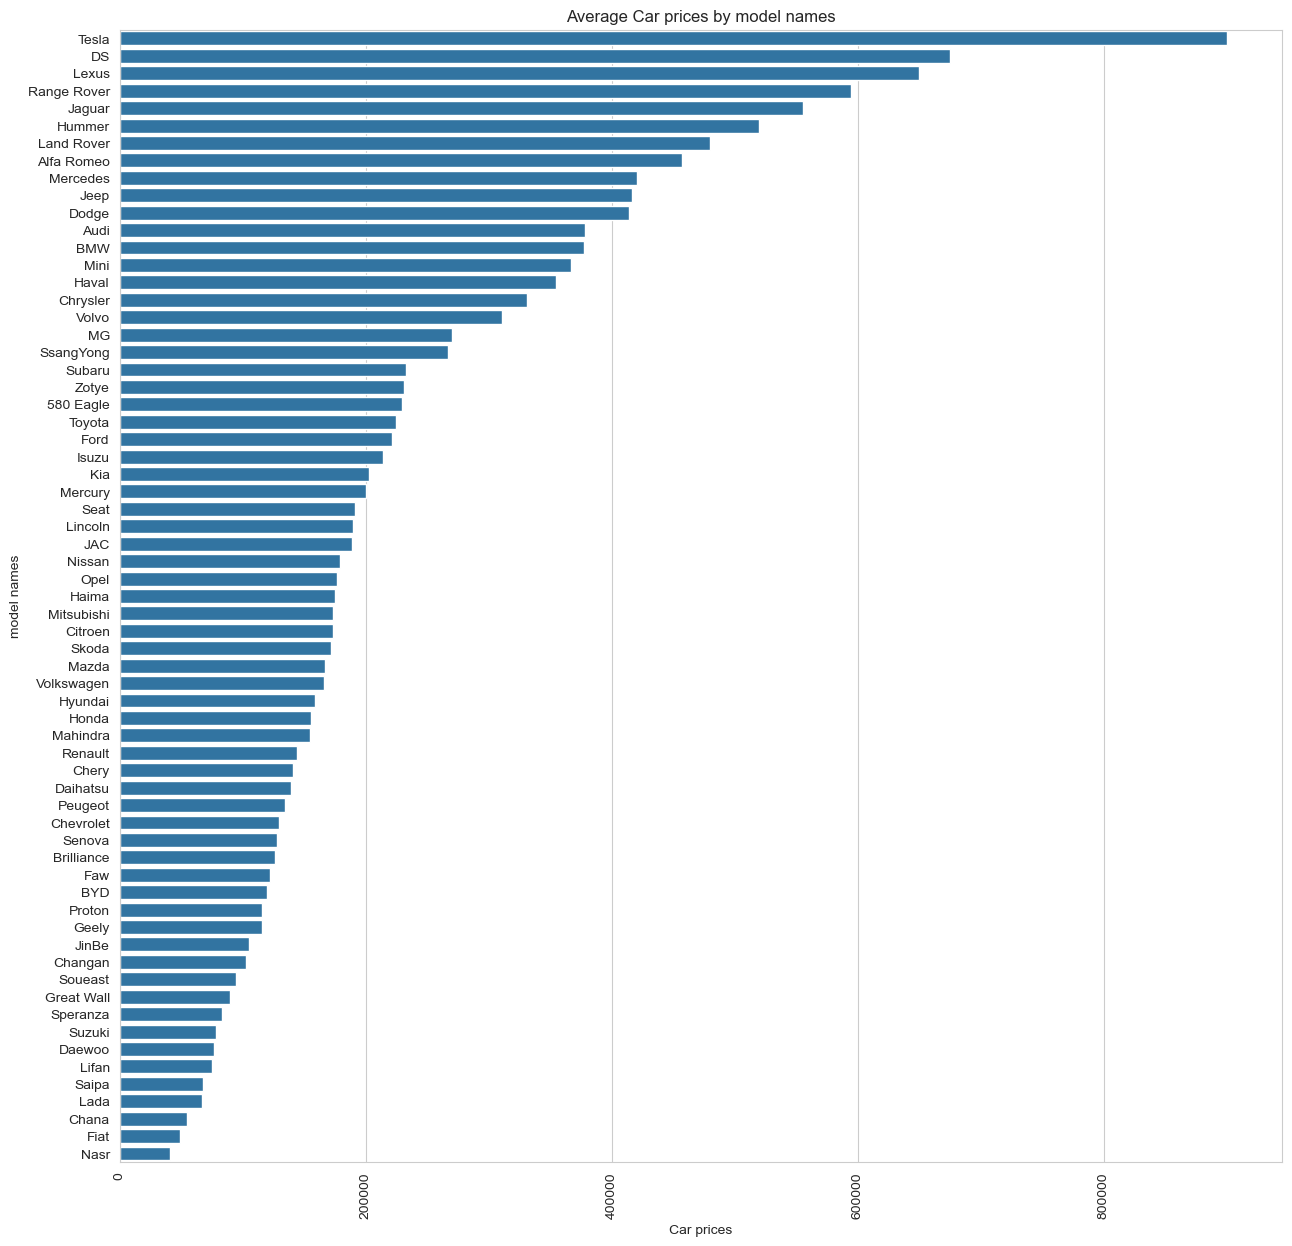

In [62]:
#Average Car prices by model names
plt.figure(figsize=(15,15),dpi=100);
counts = df.groupby('Model_name')['Car_price'].mean().sort_values(ascending=False)
sns.barplot(data=df,y=counts.index,x=counts.values,color=base_color);
plt.xlabel('Car prices');
plt.ylabel('model names');
plt.xticks(rotation=90)
plt.title('Average Car prices by model names');
print(counts)

Transmission_type
Dual Clutch   377243.33
CVT           293657.41
Automatic     235668.58
Manual         81986.61
Name: Car_price, dtype: float64


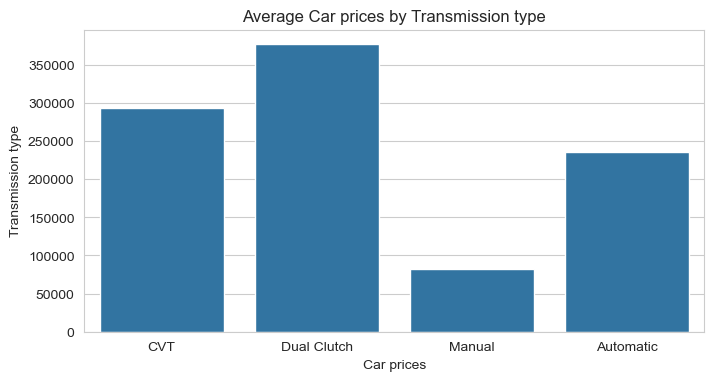

In [63]:
#Average Car prices by Transmission type
plt.figure(figsize=(8,4),dpi=100);

Transmission_type_values=['CVT','Dual Clutch','Manual','Automatic']
Transmission = pd.api.types.CategoricalDtype(ordered=True, categories=Transmission_type_values)
df['Transmission_type'] = df['Transmission_type'].astype(Transmission)

counts = df.groupby('Transmission_type')['Car_price'].mean().sort_values(ascending=False)
sns.barplot(data=df,x=counts.index,y=counts.values,color=base_color);
plt.xlabel('Car prices');
plt.ylabel('Transmission type');
plt.title('Average Car prices by Transmission type');
print(counts)

**Graphic conclusion:**
- It seems that The Transmission type is also an important feature that would affect the price of the car since every Transmission type has it's price range

### Multivariate Analysis

- In this section we will investigate several columns together to find out how does some independent columns affect our dependent column (Car price)

- In the below figures we will filter several cars with the same features and keep one different independent variable among them & check how that difference affect the price

- We have already illustrated using regplot that the relation between kilometers column and price column but we will further elaborate that using a real life example from our dataset


### 1.Kilometers

In [64]:
#filtering cars with the same features but with different kilometers number 
df[(df['Model_name']=='Mercedes') & (df['SubModel_name']=='Mercedes E200') & (df['Model_year']=='2015') & (df['Body_type']=='Sedan') & (df['Motor_capacity']=='2000 cc') & (df['Transmission_type']=='Automatic') & (df['Car_color']=='Black')]

,Mobile_number,Model_name,SubModel_name,Car_description,Kilometers_crossed,Car_price,Model_year,Body_type,Transmission_type,Motor_capacity,Car_color,Waranty_condition,car_key,Analoge_Air_Condition,Rear_parking_sensors,Rear_view_camera,Leather_Seats,Electronic_window,Sun_Roof,Panorama_roof,Power_mirror,Aux,Bluetooth,USB,Touch_screen,Anti_Lock_Braking_System_ABS,Cruise_Control,Air_Bags_For_Driver,Air_Bags_Passenger,Side_Airbags,Traction_Control,Area,Governorate,week_day,Month,Payment_option,Car_paint_final
2056,01278363919,Mercedes,Mercedes E200,#T_AUTO \n\n🎩🎩🎩🎩🎩🎩\n\n#Mercedes_E200 🔛Avantgarde \n\nModel 2015 \n\n130.000 Km كاوتش جديد ⚙️صيانات منتظمة\n\n✅السيارة فابريكة بالكامل عدا الاكصدامين اللون اسود فرش اسود \n\n🚦رخصه سنه مرور القاهرة الجديدة \n\n700.000 EGP 💰💰\n\n📍المعاينه : 88 عمار بن ياسر - الكليه الحربيه - مصر الجديدة \n\nللتواصل 📞📞: \n\n�01096961716📱\n📱01278363919📱,130000,700000,2015,Sedan,Automatic,2000 cc,Black,Not available,Not available,Analoge Air Condition,Rear parking sensors,Not available,Leather Seats,Electronic Window,Sun Roof,Panorama Roof,Power mirror,AUX,Bluetooth,USB,Not available,Anti-Lock Braking System (ABS),Cruise Control,Air Bags For Driver,Air Bags Passenger,Not available,Not available,Heliopolis,Cairo,Monday,October,Cash,Factory Paint
3688,01096966496,Mercedes,Mercedes E200,لبيع مرسيدسE200 موديل 2015 بحاله جيده جدا جميع الكماليات فتحه سقف دهان المصنع داخلى وخارجى بالكامل حتى الاكصدامات يوجد بعض الخرابيش البسيطه بالاكصدام ماشيه 178 الف كيلو صيانات بالتوكيل بالفواتير البيع بعقد مسجل,179999,720000,2015,Sedan,Automatic,2000 cc,Black,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Attarin,Alexandria,Monday,October,Cash,Not available
11462,01098933666,Mercedes,Mercedes E200,بانوراماألمانى صيانة الوكيل\nكاش أو قسط,110000,725000,2015,Sedan,Automatic,2000 cc,Black,Not available,Not available,Analoge Air Condition,Rear parking sensors,Not available,Leather Seats,Electronic Window,Sun Roof,Panorama Roof,Power mirror,AUX,Bluetooth,USB,Not available,Anti-Lock Braking System (ABS),Cruise Control,Air Bags For Driver,Air Bags Passenger,Not available,Not available,Heliopolis,Cairo,Thursday,October,Installment,Factoty Paint


In [65]:
df['Car_description'][2056]

'#T_AUTO \n\n🎩🎩🎩🎩🎩🎩\n\n#Mercedes_E200  🔛Avantgarde \n\nModel 2015  \n\n130.000 Km  كاوتش جديد ⚙️صيانات منتظمة\n\n✅السيارة فابريكة بالكامل عدا الاكصدامين  اللون اسود فرش اسود \n\n🚦رخصه سنه مرور القاهرة الجديدة \n\n700.000 EGP 💰💰\n\n📍المعاينه : 88 عمار بن ياسر - الكليه الحربيه - مصر الجديدة \n\nللتواصل 📞📞: \n\n�01096961716📱\n📱01278363919📱'

In [66]:
df['Car_description'][3688]

'لبيع مرسيدسE200 موديل 2015 بحاله جيده جدا جميع الكماليات فتحه سقف دهان المصنع داخلى وخارجى بالكامل حتى الاكصدامات يوجد بعض الخرابيش البسيطه بالاكصدام ماشيه 178 الف كيلو صيانات بالتوكيل بالفواتير البيع بعقد مسجل'

In [67]:
df['Car_description'][11465]

'- فابريكة بالكامل - السيارة بحالة ممتازة. - اطارات وبطارية جديدة. - جميع الصيانات موثقة (التوكيل ومراكز صيانة متكاملة). - استبن لم يستخدم. - المفتاح الاحتياطي متوفر. - لا تحتاج مصاريف علي الاطلاق. - رخصة سارية حتي ١٢/٢٠٢٣ - مرور الشيخ زايد. - مالك اول. - السعر المطلوب: ١٢٥،٠٠٠ جنيه. - للجادين فقط.'

 **Conclusion:**
 
- As illustrated above , all the cars that are similar in features and in condition have different prices as per their number of kilometers crossed cars with index of 2056 & 11465 , the car in index 3688 did'nt follow the same behaviour as it's condition differs than the others

### 2.Model year

In [68]:
#filtering cars with the same features but with different Model year 
df[(df['Model_name']=='Fiat') & (df['SubModel_name']=='Fiat 128 nova') & (df['Kilometers_crossed']==9999) & (df['Body_type']=='Sedan') & (df['Motor_capacity']=='1300 cc') & (df['Transmission_type']=='Manual') & (df['Car_color']=='White')]

,Mobile_number,Model_name,SubModel_name,Car_description,Kilometers_crossed,Car_price,Model_year,Body_type,Transmission_type,Motor_capacity,Car_color,Waranty_condition,car_key,Analoge_Air_Condition,Rear_parking_sensors,Rear_view_camera,Leather_Seats,Electronic_window,Sun_Roof,Panorama_roof,Power_mirror,Aux,Bluetooth,USB,Touch_screen,Anti_Lock_Braking_System_ABS,Cruise_Control,Air_Bags_For_Driver,Air_Bags_Passenger,Side_Airbags,Traction_Control,Area,Governorate,week_day,Month,Payment_option,Car_paint_final
93,01203454347,Fiat,Fiat 128 nova,عربية 128 موديل 79 بها رخصة 6 شهور مرور الزقازيق بحاله جيدة جدا لا تحتاج لاي مصروف \nبطارية جديدة,9999,23000,1979,Sedan,Manual,1300 cc,White,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Sharabia,Cairo,Wednesday,October,Cash,Not available
158,01113835359,Fiat,Fiat 128 nova,السيارة موديل ١٩٩٨ ماتور ١٥٠٠ مثبوت ع الرخصه ١٣٠٠ العربيه مشدوده تماما ردياتير جديد بطاريه جديده مارش و دينامو جداد جنط و كاوتش مكملوش ٣ شهور طقم سماعات سوني كاسيت ادريان ... المعاينه الجمعه فقط برجاء احضار فني عند المعاينه شكراً,9999,30000,1998,Sedan,Manual,1300 cc,White,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Maadi,Cairo,Monday,October,Cash,Not available
3432,01149873580,Fiat,Fiat 128 nova,المراغه سوهاج سيارة فيات موديل 1990 لون سن الفيل راشه خارجى فقط دواخل زيرو بمعنى الكلمة مرور طهطا رخصه سنة ونص استخدام بسيط جدا لسه معمولها صيانة كامله على العفشه وفيها اربع فرد كاوتش جداد واستبن حالته جيده جدا البيع للتغير لاعلى فقط والتواصل عن طريق الفون فقط لعدم تواجدى على النت رقم التواصل زيرو احدى عشر اربعه تسعه تمانيه سبعه ثلاثه خمسه تمانيه زيرو /,9999,28000,1990,Sedan,Manual,1300 cc,White,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Maragha,Sohag,Tuesday,October,Cash,Not available
3728,01149182593,Fiat,Fiat 128 nova,فيات128لسة معمرة جيد ومرشوشة جديد,9999,16000,1976,Sedan,Manual,1300 cc,White,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,El Salam City,Cairo,Saturday,October,Cash,Not available
4139,01140021044,Fiat,Fiat 128 nova,مرور السلام رخصة ٣ سنين \n_x000D_العربية بحاله ممازة لا يوجد اى صدمات,9999,25000,1987,Sedan,Manual,1300 cc,White,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Sharabia,Cairo,Saturday,October,Cash,Not available
4284,01014347925,Fiat,Fiat 128 nova,سيارة فيات١٢٨ ماكينة كبيرة ١٣٠٠ سيسي ٥ غيار مرور ميت غمر رخصة باسمي باقي في الرخصة سنتين سيارة جنو سبور ١٣ و٤ فرد كوتش زيرو بطارية زيرو السيارة بحالة جيدة والسعر قابل للتفاوض البسيط,9999,21000,1989,Sedan,Manual,1300 cc,White,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Mit Ghamar,Dakahlia,Saturday,October,Cash,Not available
4587,01552888625,Fiat,Fiat 128 nova,عريه فيات 128 جراند لوك

In [69]:
df['Car_description'][93]

'عربية 128 موديل 79 بها رخصة 6 شهور مرور الزقازيق بحاله جيدة جدا لا تحتاج لاي مصروف \nبطارية جديدة'

In [70]:
df['Car_description'][158]

'السيارة موديل ١٩٩٨ ماتور ١٥٠٠ مثبوت ع الرخصه ١٣٠٠ العربيه مشدوده تماما ردياتير جديد بطاريه جديده مارش و دينامو جداد جنط و كاوتش مكملوش ٣ شهور  طقم سماعات سوني كاسيت ادريان ... المعاينه الجمعه فقط برجاء احضار فني عند المعاينه شكراً'

In [71]:
df['Car_description'][3432]

'المراغه سوهاج  سيارة فيات موديل 1990 لون سن الفيل راشه خارجى فقط دواخل زيرو بمعنى الكلمة مرور طهطا رخصه سنة ونص استخدام بسيط جدا لسه معمولها صيانة كامله على العفشه وفيها اربع فرد كاوتش جداد واستبن حالته جيده جدا البيع للتغير لاعلى فقط والتواصل عن طريق الفون فقط لعدم تواجدى على النت رقم التواصل زيرو احدى عشر اربعه تسعه تمانيه سبعه ثلاثه خمسه تمانيه زيرو /'

In [72]:
df['Car_description'][3729]

'اوبترا فبريكا دواخ رشه اجزء من الخارج تكيف بسم لله مشاء الله تمام المتور فوق الممتاز السياره لا تحتاج اي مصاريف والبطاريه لسه مغيره جنوط اسبور السياره الله واكبر زاي الفل'

In [73]:
df['Car_description'][4140]

'فبريكه باكامل حتي الاكصدمات عدد٨٧ الف\nرشه غطاء الشنطه الخارجي فقط 1600ccالفئه التانيه البيع بعقد مسجل'

(-0.5, 4.5)

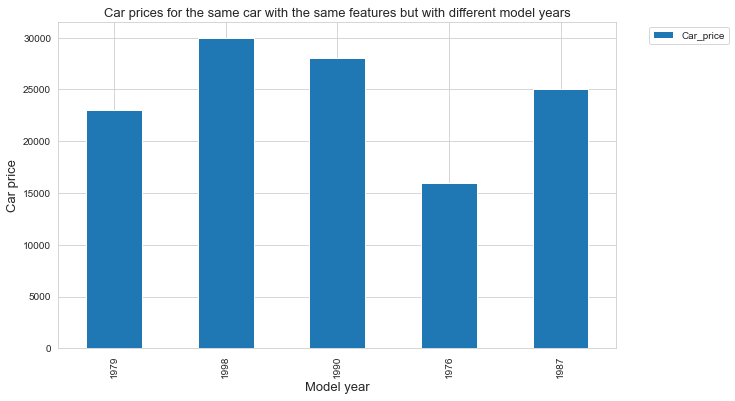

In [74]:
#plotting the figure
df[(df['Model_name']=='Fiat') & (df['SubModel_name']=='Fiat 128 nova') & (df['Kilometers_crossed']==9999) & (df['Body_type']=='Sedan') & (df['Motor_capacity']=='1300 cc') & (df['Transmission_type']=='Manual') & (df['Car_color']=='White')].plot.bar(figsize = (10,6),x='Model_year',y='Car_price')
plt.title('Car prices for the same car with the same features but with different model years',size=13);
plt.xlabel('Model year',size=13);
plt.ylabel('Car price',size=13);
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left');
plt.xlim(right=4.5)

**Graphic conclusion:**
- As illustrated above for the cars with the same description mentioned and same features and color we can see that the only difference is the year and every year has it's own price range (As the Model year increases the price gets higher)


Now we are done with our analysis and answered important questions that intrests the Contributors, We will move on to our Machine learning that will predict each car price according to it's features

### Model Building

First of all we will drop the submodels that we have in our data that are represented less than 30 times to enhance our model prediction

In [75]:
#count of each Submodel
df['SubModel_name'].value_counts()

Mitsubishi Lancer                417
Nissan Sunny                     384
Hyundai Verna                    306
Toyota Corolla                   286
Kia Grand Cerato                 249
Chevrolet Optra                  242
Daewoo Nubira                    236
Skoda Octavia                    228
Hyundai Elantra                  228
Fiat 128 nova                    225
Daewoo Lanos                     220
Chevrolet Lanos                  210
Renault Logan                    207
Chevrolet Aveo                   201
Hyundai Accent                   188
Opel Astra                       165
Speranza A516                    137
Hyundai Excel                    130
Geely Emgrand 7                  129
Suzuki Van                       109
Kia Sportage                     108
Hyundai Matrix                   106
Mercedes C180                    102
BYD F3                           100
Kia Rio                           98
Opel Vectra                       98
Kia Carens                        97
M

In [76]:
s = df['SubModel_name'].value_counts()
df=df[df.isin(s.index[s >=30]).values]

In [77]:
#Selecting features into a new dataframe that we will use to train the model on
df1=df[['Payment_option','Kilometers_crossed','Model_name','SubModel_name','Area','Governorate','Motor_capacity','Car_color','Analoge_Air_Condition','Electronic_window','Car_paint_final','Model_year','Transmission_type','Body_type','Sun_Roof','Rear_view_camera','Cruise_Control','Rear_parking_sensors','Leather_Seats','Bluetooth','Air_Bags_Passenger','Anti_Lock_Braking_System_ABS','USB','Power_mirror','Aux','Air_Bags_For_Driver','Car_price','Side_Airbags','car_key','Panorama_roof','Traction_Control','Touch_screen','Waranty_condition']]

In [78]:
#Transforming using label_encoder
from sklearn.preprocessing import LabelEncoder
df1['Model_name']=LabelEncoder().fit_transform(df1['Model_name'])
df1['SubModel_name']=LabelEncoder().fit_transform(df1['SubModel_name'])
df1['Area']=LabelEncoder().fit_transform(df1['Area'])
df1['Governorate']=LabelEncoder().fit_transform(df1['Governorate'])
df1['Motor_capacity']=LabelEncoder().fit_transform(df1['Motor_capacity'])
df1['Car_color']=LabelEncoder().fit_transform(df1['Car_color'])
df1['Analoge_Air_Condition']=LabelEncoder().fit_transform(df1['Analoge_Air_Condition'])
df1['Electronic_window']=LabelEncoder().fit_transform(df1['Electronic_window'])
df1['Car_paint_final']=LabelEncoder().fit_transform(df1['Car_paint_final'])
df1['Model_year']=LabelEncoder().fit_transform(df1['Model_year'])
df1['Transmission_type']=LabelEncoder().fit_transform(df1['Transmission_type'])
df1['Sun_Roof']=LabelEncoder().fit_transform(df1['Sun_Roof'])
df1['Rear_view_camera']=LabelEncoder().fit_transform(df1['Rear_view_camera'])
df1['Cruise_Control']=LabelEncoder().fit_transform(df1['Cruise_Control'])
df1['Rear_parking_sensors']=LabelEncoder().fit_transform(df1['Rear_parking_sensors'])
df1['Leather_Seats']=LabelEncoder().fit_transform(df1['Leather_Seats'])
df1['Air_Bags_Passenger']=LabelEncoder().fit_transform(df1['Air_Bags_Passenger'])
df1['Anti_Lock_Braking_System_ABS']=LabelEncoder().fit_transform(df1['Anti_Lock_Braking_System_ABS'])
df1['USB']=LabelEncoder().fit_transform(df1['USB'])
df1['Power_mirror']=LabelEncoder().fit_transform(df1['Power_mirror'])
df1['Aux']=LabelEncoder().fit_transform(df1['Aux'])
df1['Air_Bags_For_Driver']=LabelEncoder().fit_transform(df1['Air_Bags_For_Driver'])
df1['Bluetooth']=LabelEncoder().fit_transform(df1['Bluetooth'])
df1['Body_type']=LabelEncoder().fit_transform(df1['Body_type'])
df1['Side_Airbags']=LabelEncoder().fit_transform(df1['Side_Airbags'])
df1['car_key']=LabelEncoder().fit_transform(df1['car_key'])
df1['Panorama_roof']=LabelEncoder().fit_transform(df1['Panorama_roof'])
df1['Traction_Control']=LabelEncoder().fit_transform(df1['Traction_Control'])
df1['Touch_screen']=LabelEncoder().fit_transform(df1['Touch_screen'])
df1['Waranty_condition']=LabelEncoder().fit_transform(df1['Waranty_condition'])
df1['Payment_option']=LabelEncoder().fit_transform(df1['Payment_option'])

In [79]:
# Assign x features
X=df1.drop('Car_price',axis=1)

In [80]:
#assigning target column
y=df1['Car_price']

In [81]:
#splitting data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=200)

In [82]:
#splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=200)

In [83]:
#creating a table to mention accuracy of each model we use
results = pd.DataFrame(columns=['R2'])

1. Linear Regression

In [84]:
# importing linear regression
from sklearn.linear_model import LinearRegression

LR=LinearRegression()

#fitting data
LR.fit(X_train,y_train)

#predicting on data
LRpredictions=LR.predict(X_test)
R2 = LR.score(X_test, y_test)

#import assessing metrics
from sklearn import metrics


#Assessing results using MAE & RMSE 
print('MAE=',metrics.mean_absolute_error(y_test,LRpredictions))
print('RMSE=',np.sqrt(metrics.mean_squared_error(y_test,LRpredictions)))
print('R2=',R2)

results.loc['Linear Regression'] = R2

MAE= 49920.87735525948
RMSE= 79148.33320944518
R2= 0.5970072743553361


2. Decision Tree Regressor

In [85]:
# importing DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

DT=DecisionTreeRegressor()

#fitting data
DT.fit(X_train,y_train)

#predicting on data
DTpredictions=DT.predict(X_test)
R2 = DT.score(X_test, y_test)

#import assessing metrics
from sklearn import metrics

#Assessing results using MAE & RMSE 
print('MAE=',metrics.mean_absolute_error(y_test,DTpredictions))
print('RMSE=',np.sqrt(metrics.mean_squared_error(y_test,DTpredictions)))
print('R2=',R2)

results.loc['DecisionTreeRegressor'] = R2

MAE= 19614.360410431807
RMSE= 38352.471405573706
R2= 0.9053762033478121


3. Random Forest Regressor

In [86]:
# importing RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

RF=RandomForestRegressor()

#fitting data
RF.fit(X_train,y_train)

#predicting on data
RFpredictions=RF.predict(X_test)
R2 = RF.score(X_test, y_test)

#import assessing metrics
from sklearn import metrics

#Assessing results using MAE & RMSE 
print('MAE=',metrics.mean_absolute_error(y_test,RFpredictions))
print('RMSE=',np.sqrt(metrics.mean_squared_error(y_test,RFpredictions)))
print('R2=',R2)

results.loc['Random Forest Regressor'] = R2

MAE= 14613.888520002442
RMSE= 24672.13268411105
R2= 0.9608414101559859


### Conclusion:

Eventually, the best Machine learning model that we have used was the Random Forset algorithm which gave us the lowest MAE & RMSE, There is more space for improvement of course which we will conduct on a larger scale of data.